In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 20000)
pd.options.mode.chained_assignment = None #Ignore Error: SettingWithCopyWarning
import math
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
import os
import keras
import tensorflow as tf
from keras.layers import Input, Flatten, Dense, Lambda, Reshape, Dropout
from keras.layers import BatchNormalization
from keras.models import Model
from keras.losses import binary_crossentropy
from keras.metrics import mse, accuracy
from keras.callbacks import ReduceLROnPlateau
from keras import backend as K

keras.backend.clear_session()

# Load the data

In [2]:
#df = pd.read_csv('../data/preprocessed/cleaned_data_v7.csv', delimiter=",")
df = pd.read_csv('../data/preprocessed/cleaned_data_agg_v2.csv', delimiter=",")

key_list = df.keys().tolist()

for x in range(len(key_list)):
    if not df.columns[x] == "datum":
        if not df.columns[x] == "container_id":
            df = df.astype({key_list[x]: "float32"})

# Delete unwanted data; cast datetime

In [3]:
df = df.drop(columns=["height_in_cm"])

# set date as index ancd convert to float
df['datum'] = pd.to_datetime(df['datum'])
df = df.set_index(df['datum'])
df = df.sort_index()
df['datum_float'] = df['datum'].values.astype(float)

# Split into train/test

In [4]:
# create train test partition
training_set = df['2020-05-09 00:00:00':'2021-01-29 23:59:59']
test_set  = df['2021-01-30 00:00:00':]
print('Train Dataset:',training_set.shape)
print('Test Dataset:',test_set.shape)

Train Dataset: (19139, 25)
Test Dataset: (7539, 25)


C:\Users\david\AppData\Local\Temp/ipykernel_19644/614333153.py:2: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  training_set = df['2020-05-09 00:00:00':'2021-01-29 23:59:59']
C:\Users\david\AppData\Local\Temp/ipykernel_19644/614333153.py:3: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  test_set  = df['2021-01-30 00:00:00':]


# Loop through containers

=========== Training Container 1 ===================
Epoch 1/5
17/17 [==============================] - 35s 13ms/step - loss: 0.6734
Epoch 2/5
17/17 [==============================] - 0s 13ms/step - loss: 0.2048
Epoch 3/5
17/17 [==============================] - 0s 12ms/step - loss: 0.0201
Epoch 4/5
17/17 [==============================] - 0s 12ms/step - loss: 0.0114
Epoch 5/5
17/17 [==============================] - 0s 13ms/step - loss: 0.0132
=========== Training Container 2 ===================
Epoch 1/5
17/17 [==============================] - 14s 13ms/step - loss: 0.5521
Epoch 2/5
17/17 [==============================] - 0s 13ms/step - loss: 0.1585
Epoch 3/5
17/17 [==============================] - 0s 12ms/step - loss: 0.0624
Epoch 4/5
17/17 [==============================] - 0s 12ms/step - loss: 0.0448
Epoch 5/5
17/17 [==============================] - 0s 12ms/step - loss: 0.0555
=========== Training Container 3 ===================
Epoch 1/5
10/10 [==============================] 

17/17 [==============================] - 14s 13ms/step - loss: 0.1074
Epoch 2/5
17/17 [==============================] - 0s 12ms/step - loss: 0.0172
Epoch 3/5
17/17 [==============================] - 0s 12ms/step - loss: 0.0156
Epoch 4/5
17/17 [==============================] - 0s 12ms/step - loss: 0.0179
Epoch 5/5
17/17 [==============================] - 0s 12ms/step - loss: 0.0165
=========== Training Container 20 ===================
Epoch 1/5
13/13 [==============================] - 14s 13ms/step - loss: 0.4729
Epoch 2/5
13/13 [==============================] - 0s 13ms/step - loss: 0.1935
Epoch 3/5
13/13 [==============================] - 0s 13ms/step - loss: 0.0472
Epoch 4/5
13/13 [==============================] - 0s 12ms/step - loss: 0.0217
Epoch 5/5
13/13 [==============================] - 0s 13ms/step - loss: 0.0136
=========== Training Container 21 ===================
Epoch 1/5
17/17 [==============================] - 14s 13ms/step - loss: 0.4082
Epoch 2/5
17/17 [=============

C:\Users\david\AppData\Local\Temp/ipykernel_19644/284296594.py:61: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=(20,10))


=========== Training Container 22 ===================
Epoch 1/5
17/17 [==============================] - 14s 13ms/step - loss: 0.5198
Epoch 2/5
17/17 [==============================] - 0s 13ms/step - loss: 0.1203
Epoch 3/5
17/17 [==============================] - 0s 13ms/step - loss: 0.0221: 0s - loss: 0.0
Epoch 4/5
17/17 [==============================] - 0s 13ms/step - loss: 0.0300
Epoch 5/5
17/17 [==============================] - 0s 14ms/step - loss: 0.0213
=========== Training Container 23 ===================
Epoch 1/5
17/17 [==============================] - 13s 13ms/step - loss: 0.6241
Epoch 2/5
17/17 [==============================] - 0s 12ms/step - loss: 0.1486
Epoch 3/5
17/17 [==============================] - 0s 12ms/step - loss: 0.0410
Epoch 4/5
17/17 [==============================] - 0s 12ms/step - loss: 0.0327
Epoch 5/5
17/17 [==============================] - 0s 12ms/step - loss: 0.0336
=========== Training Container 24 ===================
Epoch 1/5
17/17 [=============

17/17 [==============================] - 14s 13ms/step - loss: 0.3373
Epoch 2/5
17/17 [==============================] - 0s 13ms/step - loss: 0.0869
Epoch 3/5
17/17 [==============================] - 0s 12ms/step - loss: 0.0398
Epoch 4/5
17/17 [==============================] - 0s 12ms/step - loss: 0.0300
Epoch 5/5
17/17 [==============================] - 0s 12ms/step - loss: 0.0344
=========== Training Container 41 ===================
Epoch 1/5
17/17 [==============================] - 13s 14ms/step - loss: 0.5753
Epoch 2/5
17/17 [==============================] - 0s 13ms/step - loss: 0.1380
Epoch 3/5
17/17 [==============================] - 0s 13ms/step - loss: 0.0450: 0s - loss: 0.
Epoch 4/5
17/17 [==============================] - 0s 13ms/step - loss: 0.0363
Epoch 5/5
17/17 [==============================] - 0s 13ms/step - loss: 0.0274
=========== Training Container 42 ===================
Epoch 1/5
17/17 [==============================] - 13s 13ms/step - loss: 0.5973
Epoch 2/5
17/17

17/17 [==============================] - 0s 13ms/step - loss: 0.1160
Epoch 3/5
17/17 [==============================] - 0s 12ms/step - loss: 0.0223
Epoch 4/5
17/17 [==============================] - 0s 12ms/step - loss: 0.0158
Epoch 5/5
17/17 [==============================] - 0s 12ms/step - loss: 0.0127
=========== Training Container 59 ===================
Epoch 1/5
17/17 [==============================] - 14s 13ms/step - loss: 0.7044
Epoch 2/5
17/17 [==============================] - 0s 13ms/step - loss: 0.1683
Epoch 3/5
17/17 [==============================] - 0s 12ms/step - loss: 0.0306
Epoch 4/5
17/17 [==============================] - 0s 13ms/step - loss: 0.0254
Epoch 5/5
17/17 [==============================] - 0s 12ms/step - loss: 0.0268
=========== Training Container 60 ===================
Epoch 1/5
17/17 [==============================] - 14s 12ms/step - loss: 0.5745
Epoch 2/5
17/17 [==============================] - 0s 12ms/step - loss: 0.1564
Epoch 3/5
17/17 [==============

17/17 [==============================] - 0s 13ms/step - loss: 0.0245
Epoch 4/5
17/17 [==============================] - 0s 13ms/step - loss: 0.0229: 0s - loss: 0.022
Epoch 5/5
17/17 [==============================] - 0s 13ms/step - loss: 0.0261
=========== Training Container 77 ===================
Epoch 1/5
17/17 [==============================] - 14s 13ms/step - loss: 0.6234
Epoch 2/5
17/17 [==============================] - 0s 13ms/step - loss: 0.1505
Epoch 3/5
17/17 [==============================] - 0s 13ms/step - loss: 0.0329
Epoch 4/5
17/17 [==============================] - 0s 13ms/step - loss: 0.0285
Epoch 5/5
17/17 [==============================] - 0s 13ms/step - loss: 0.0287


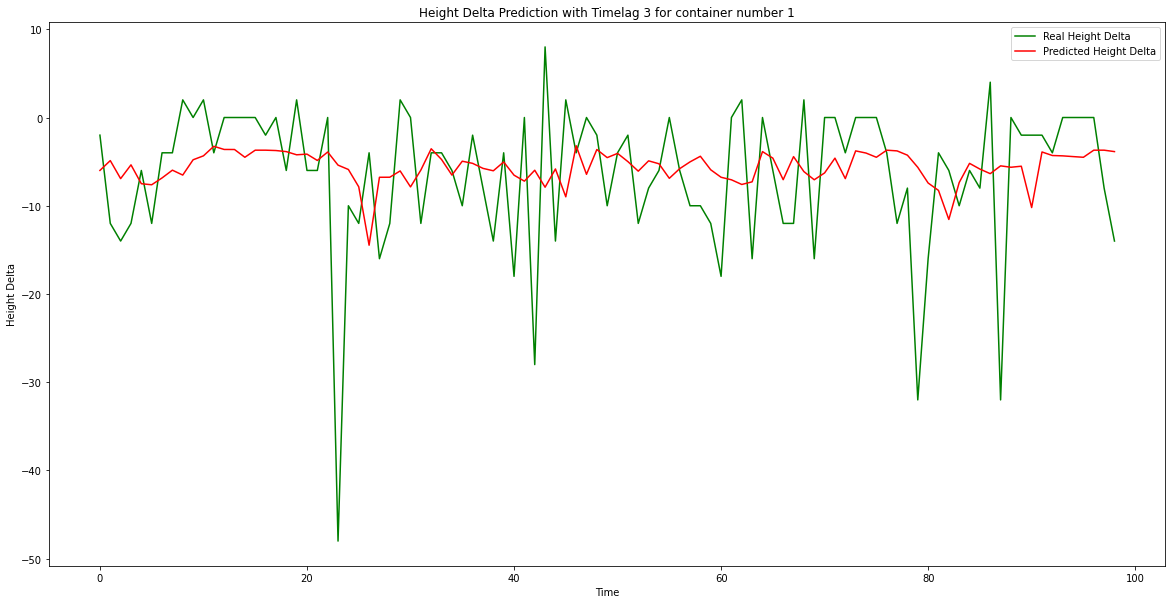

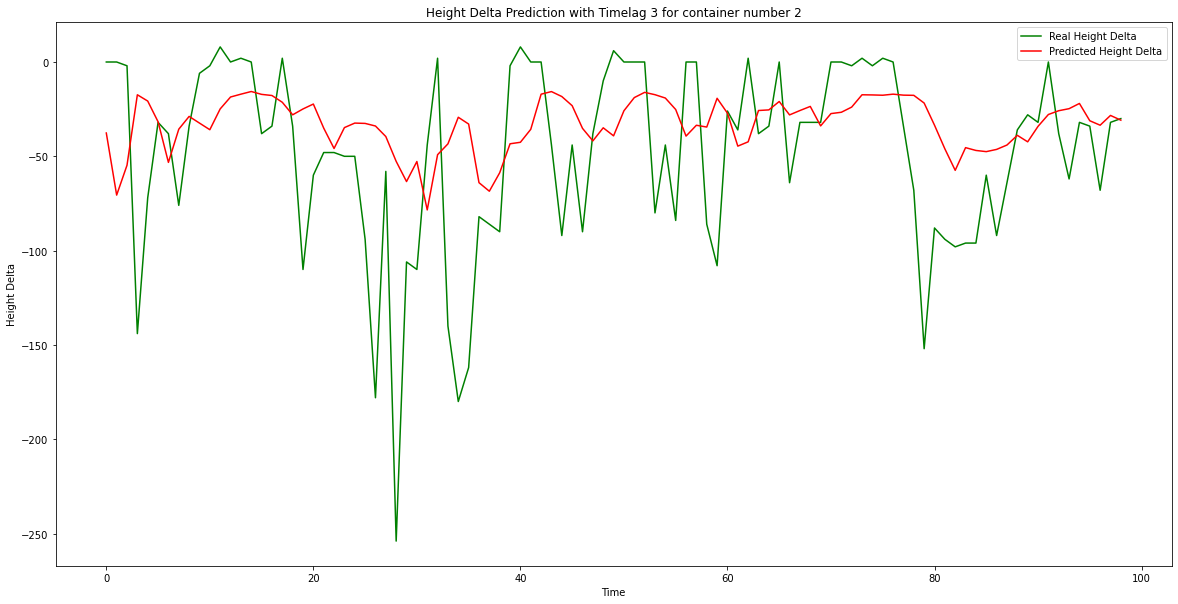

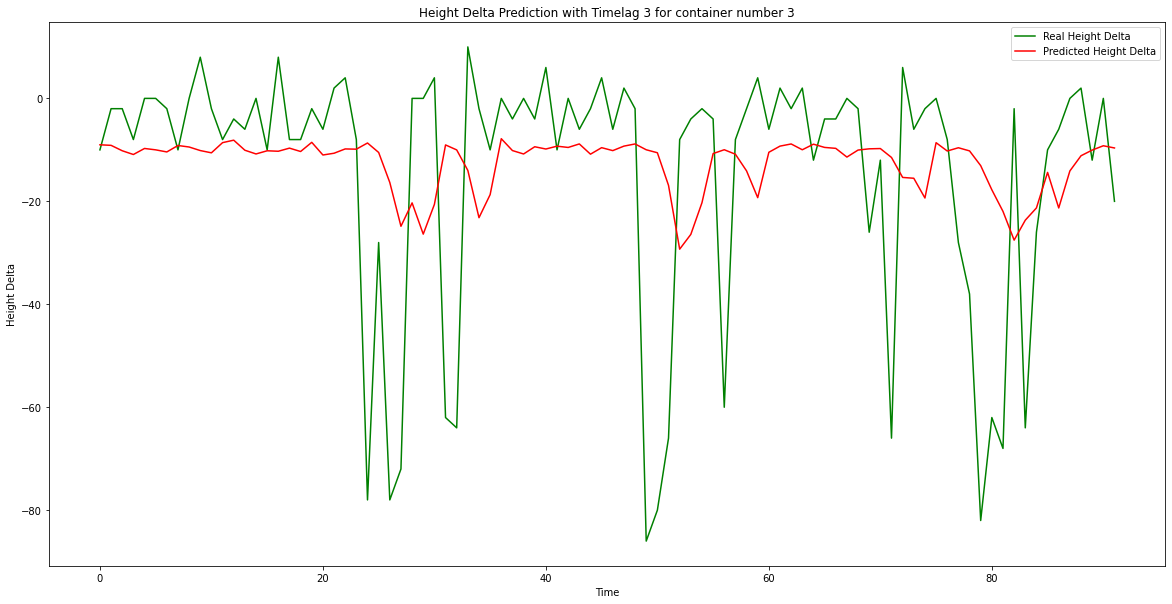

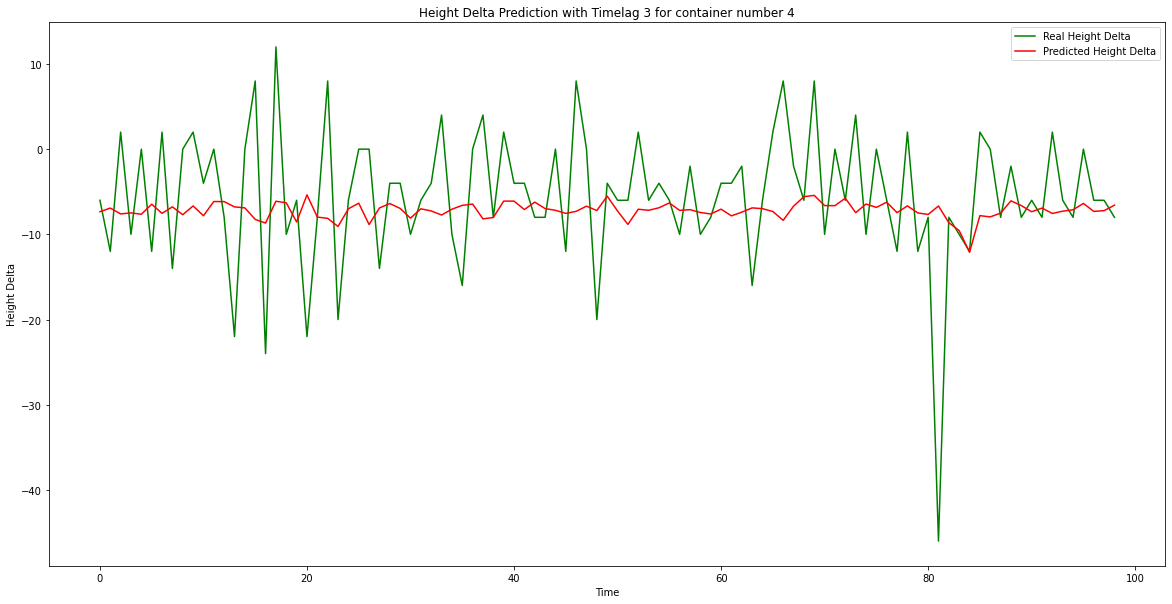

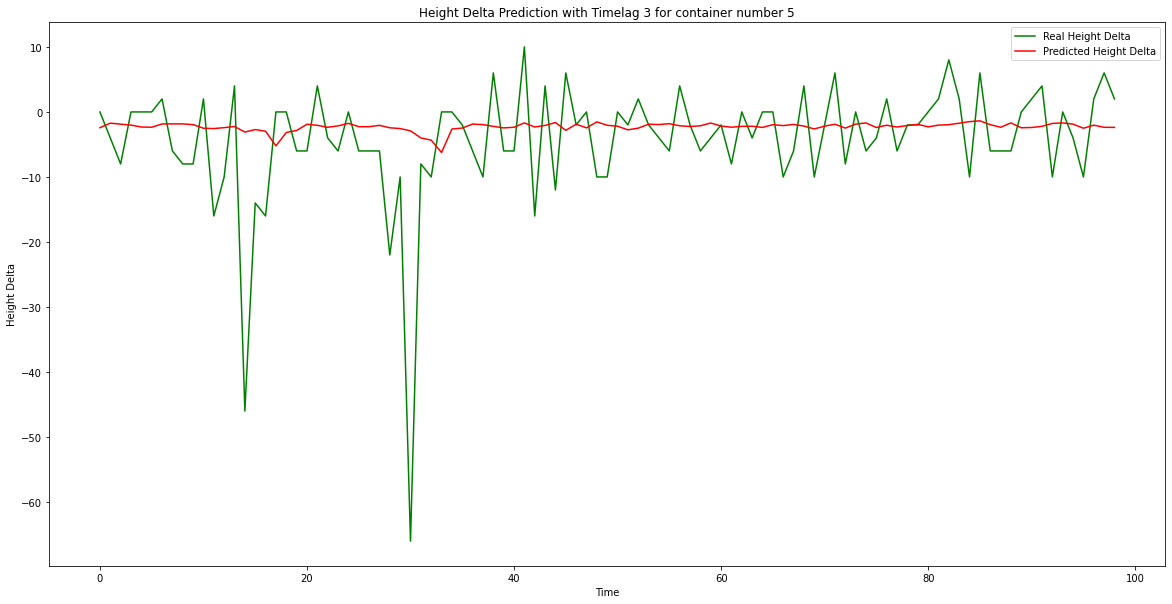

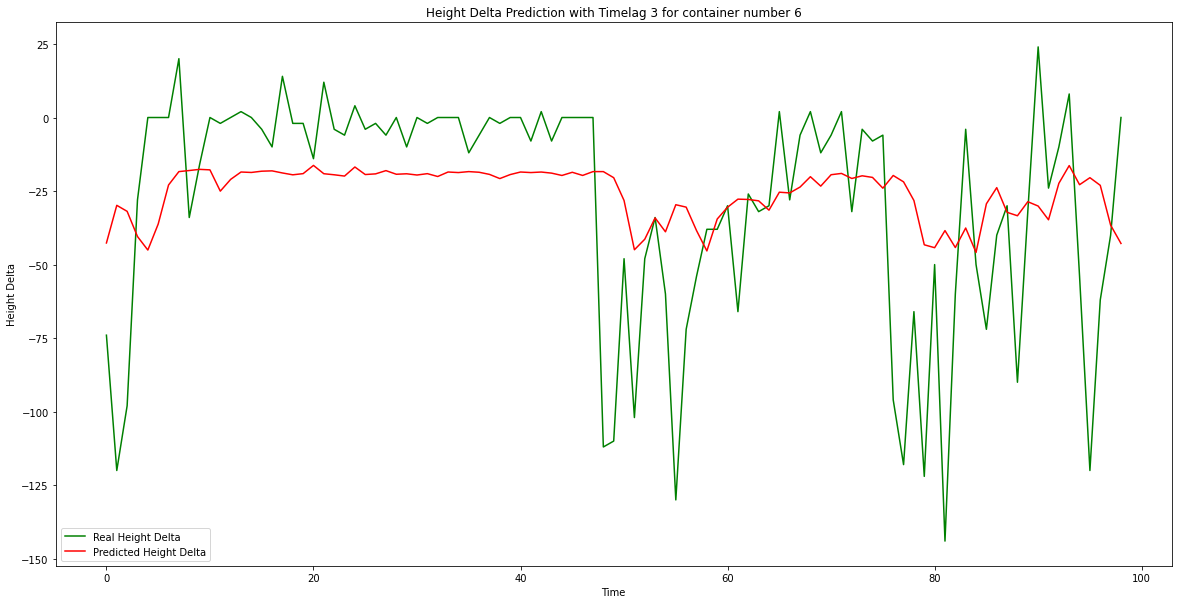

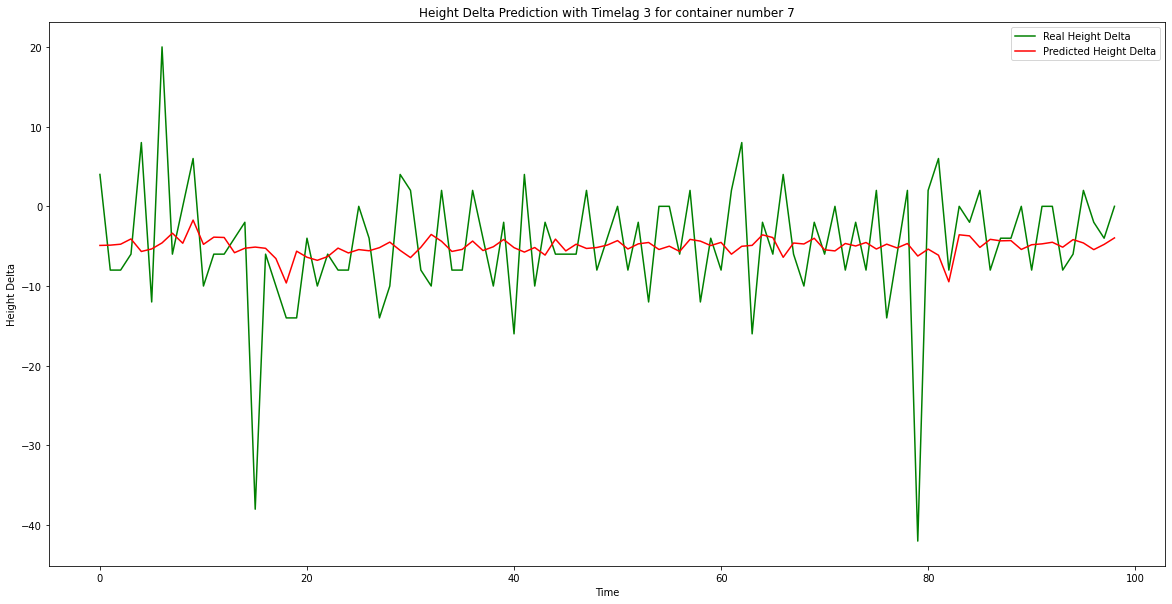

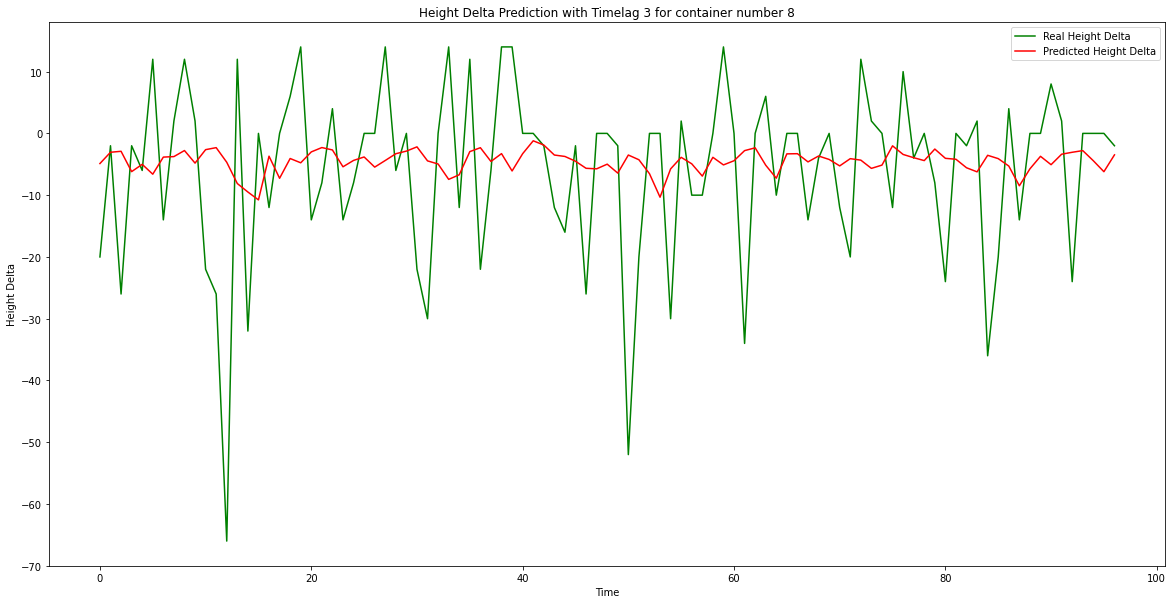

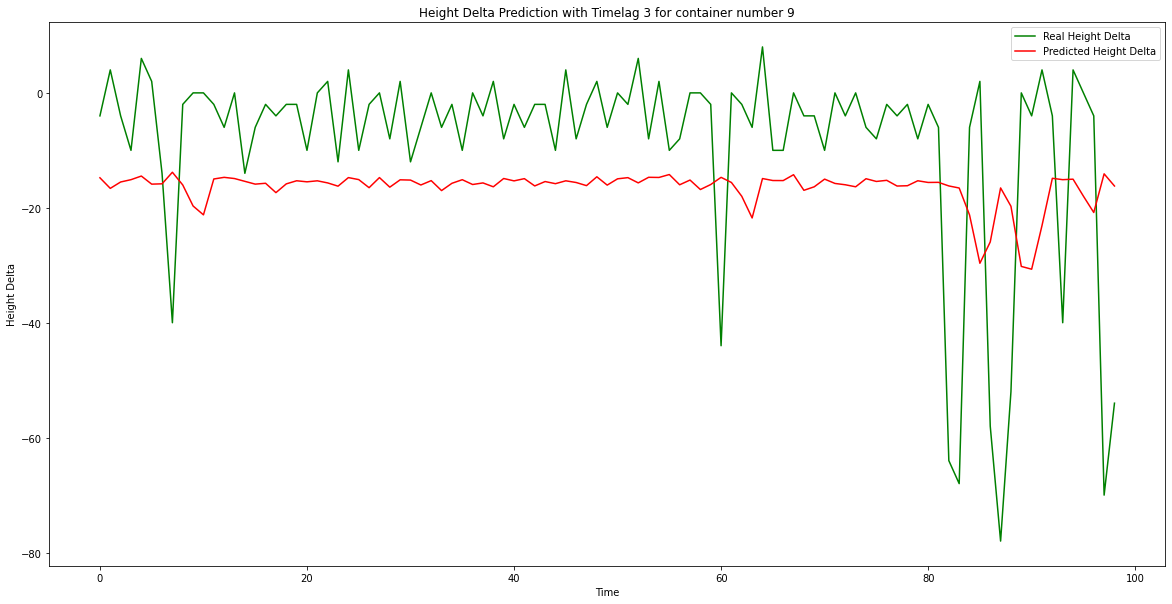

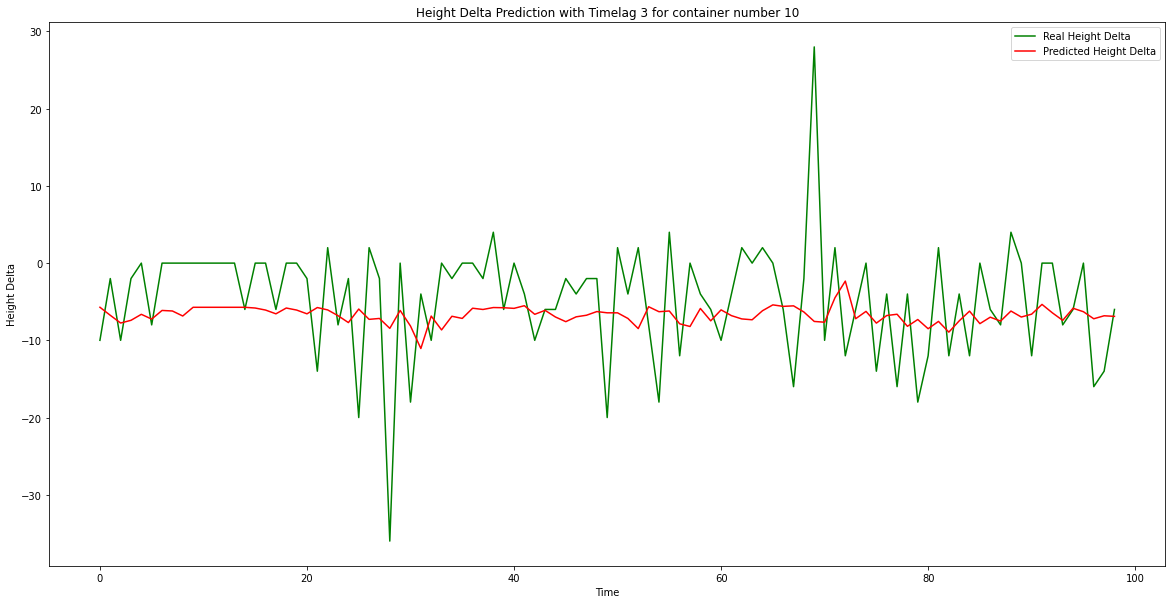

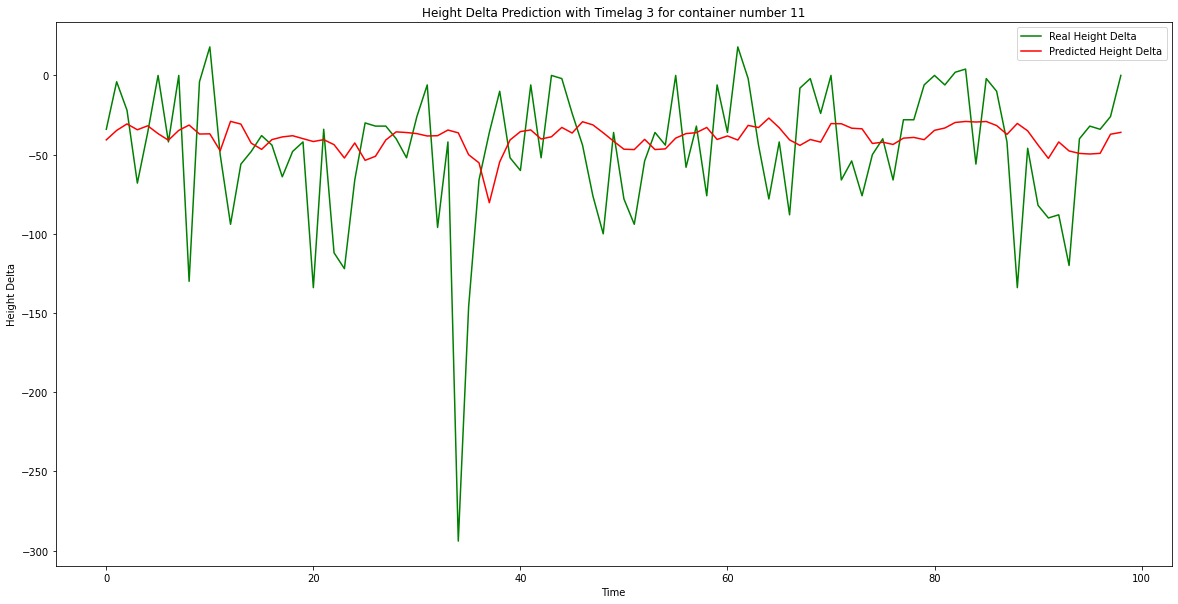

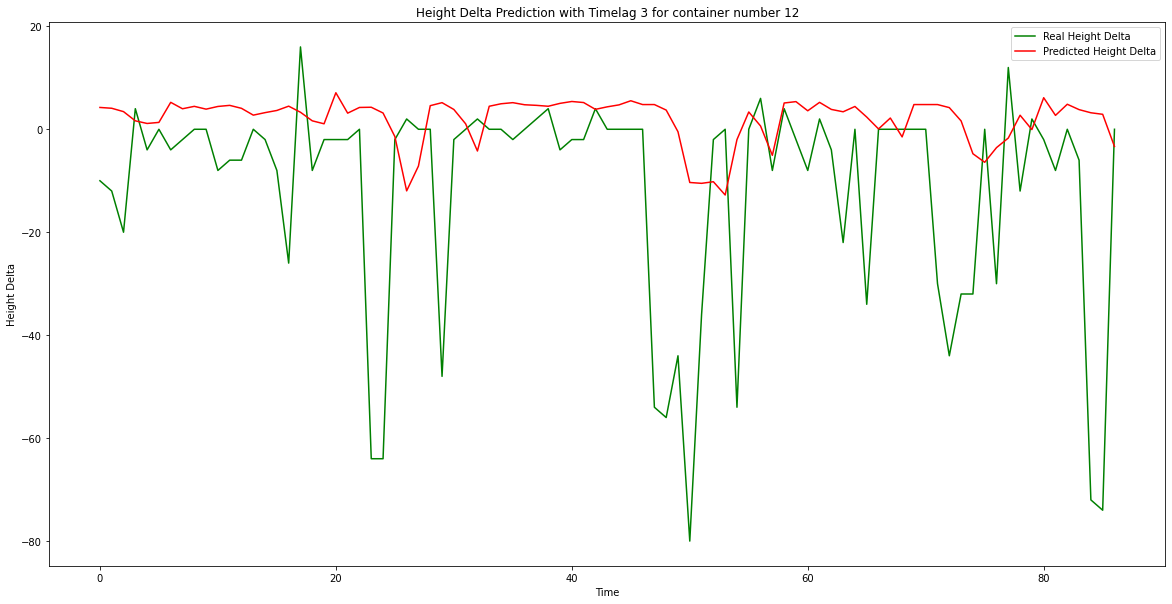

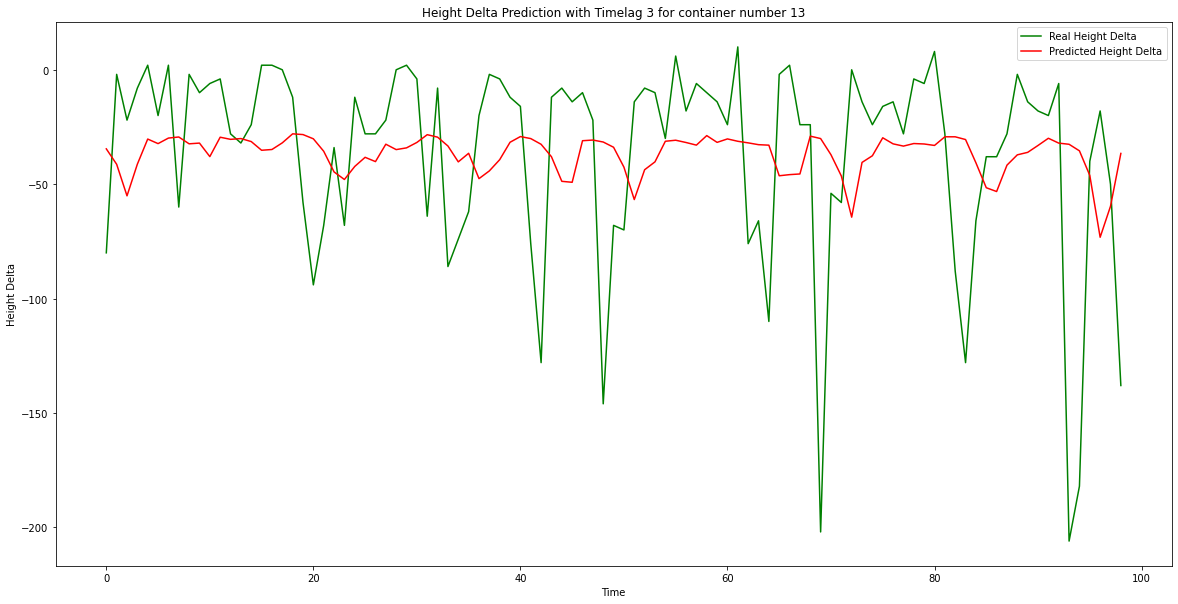

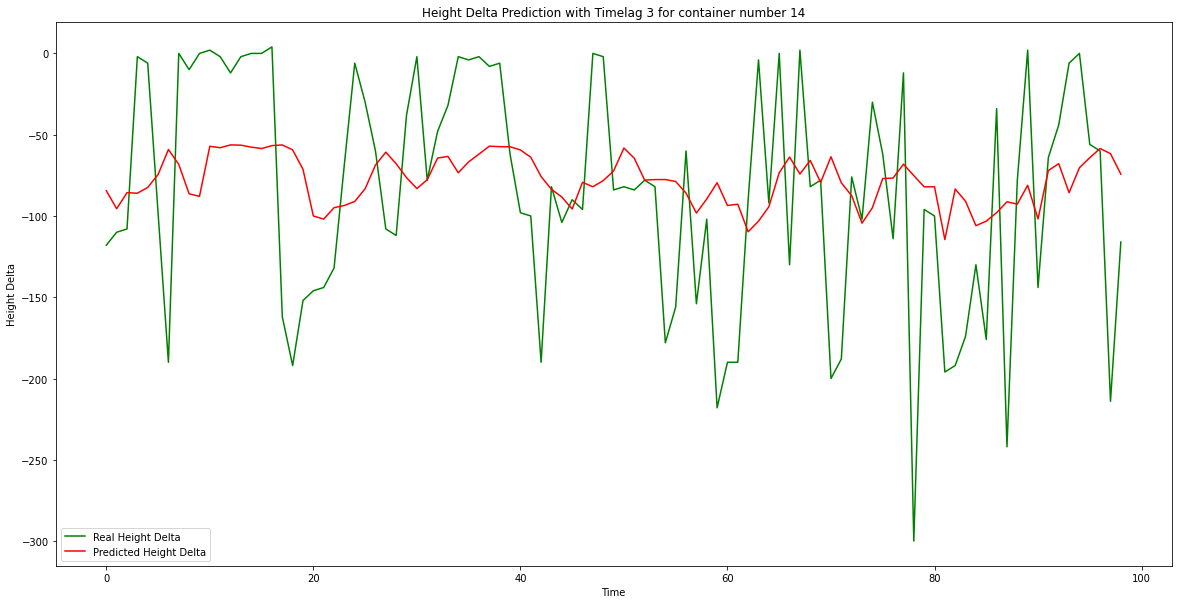

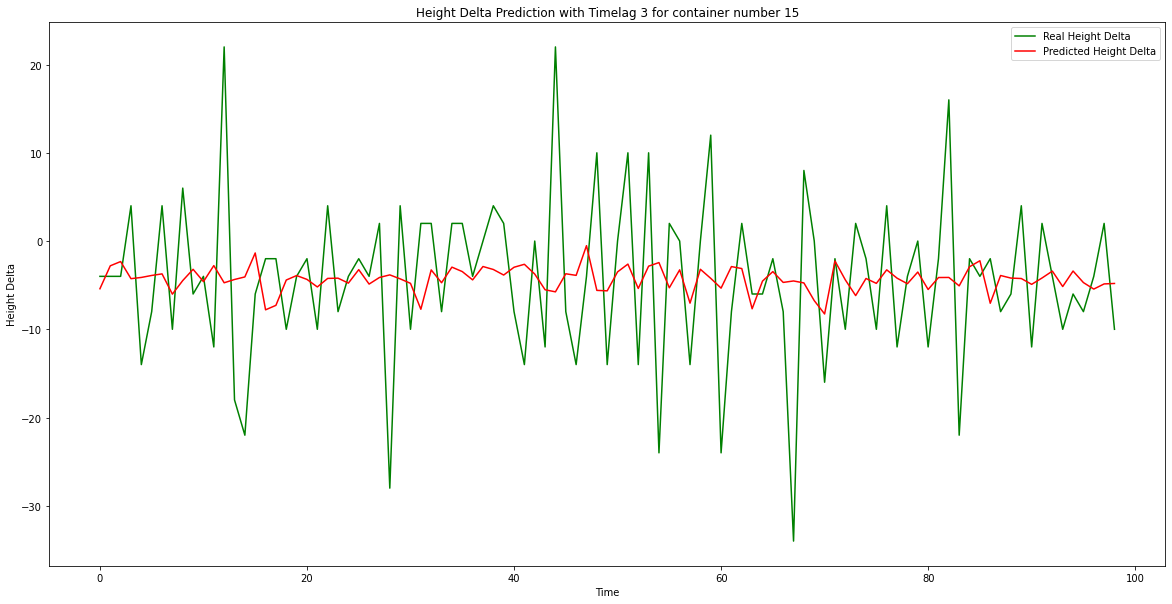

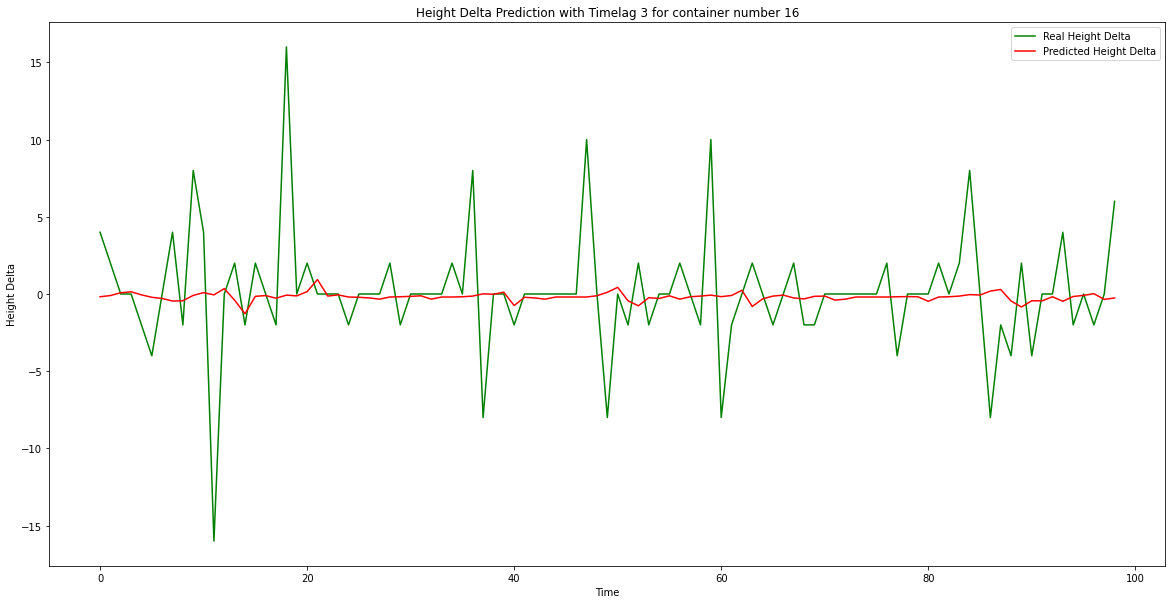

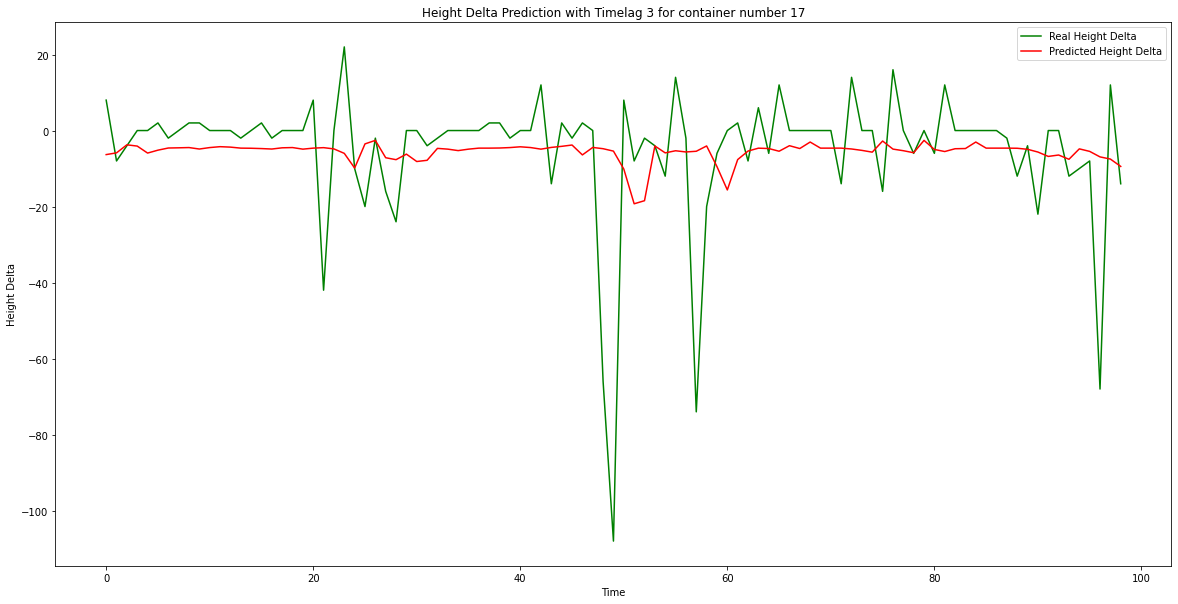

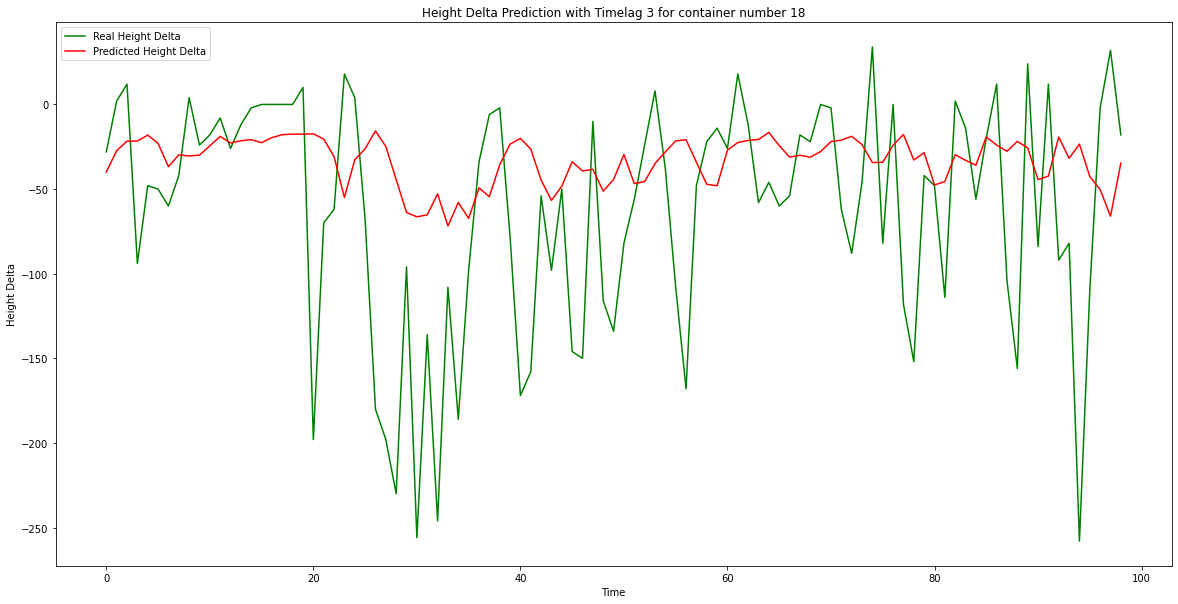

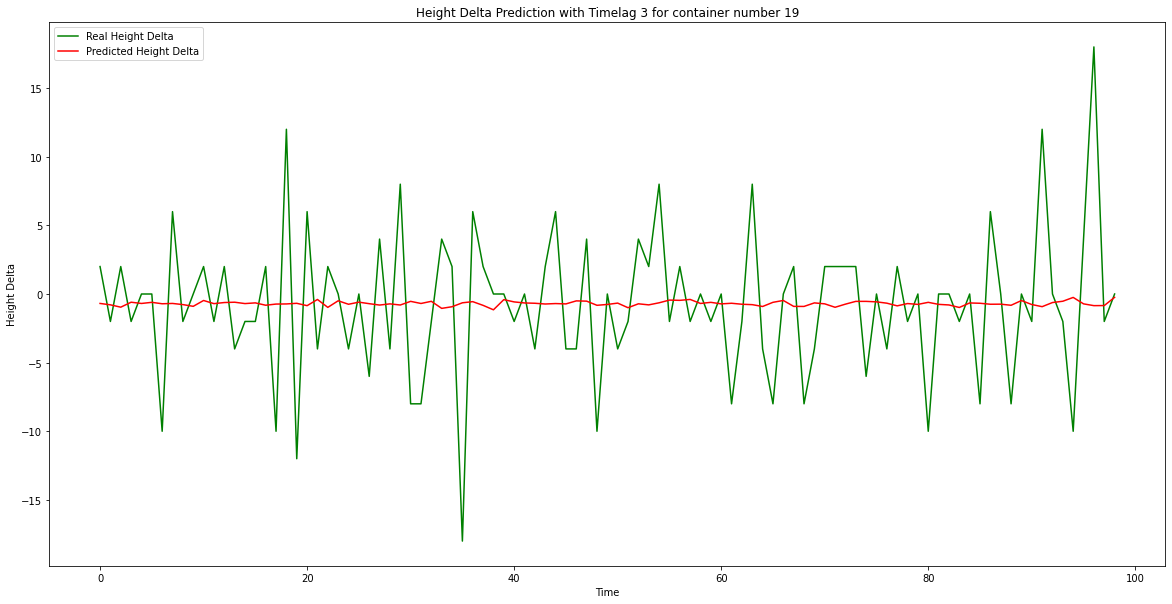

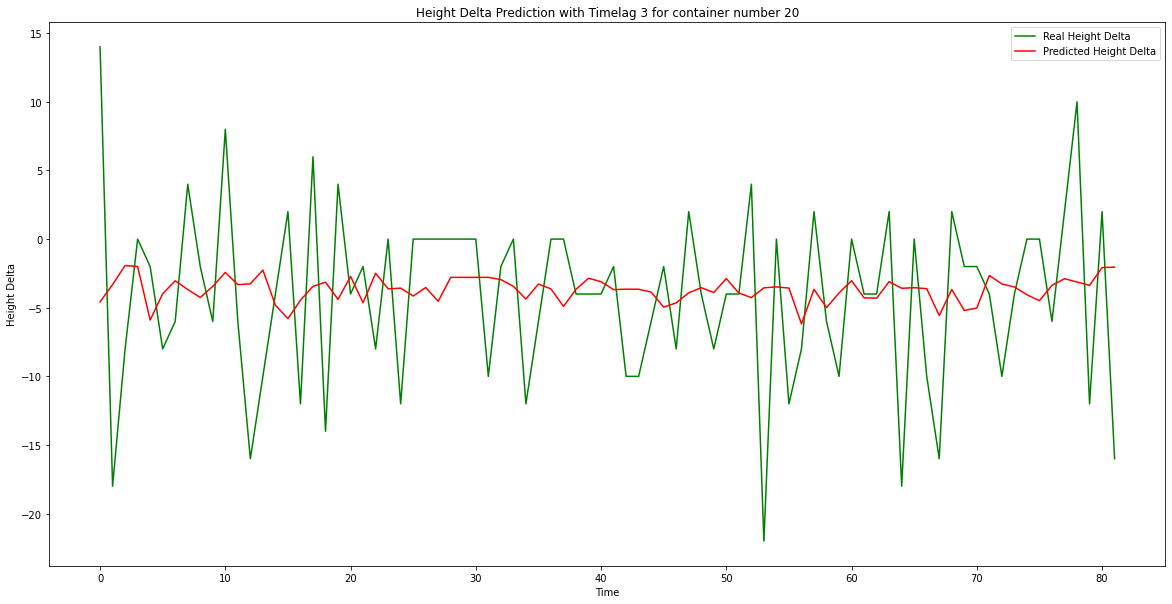

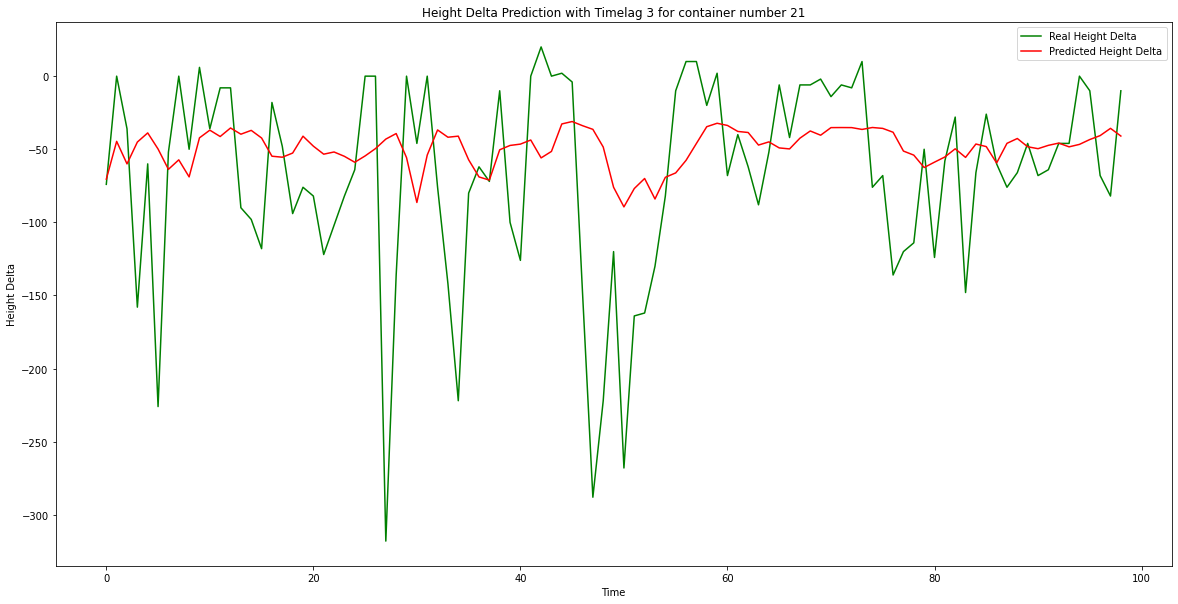

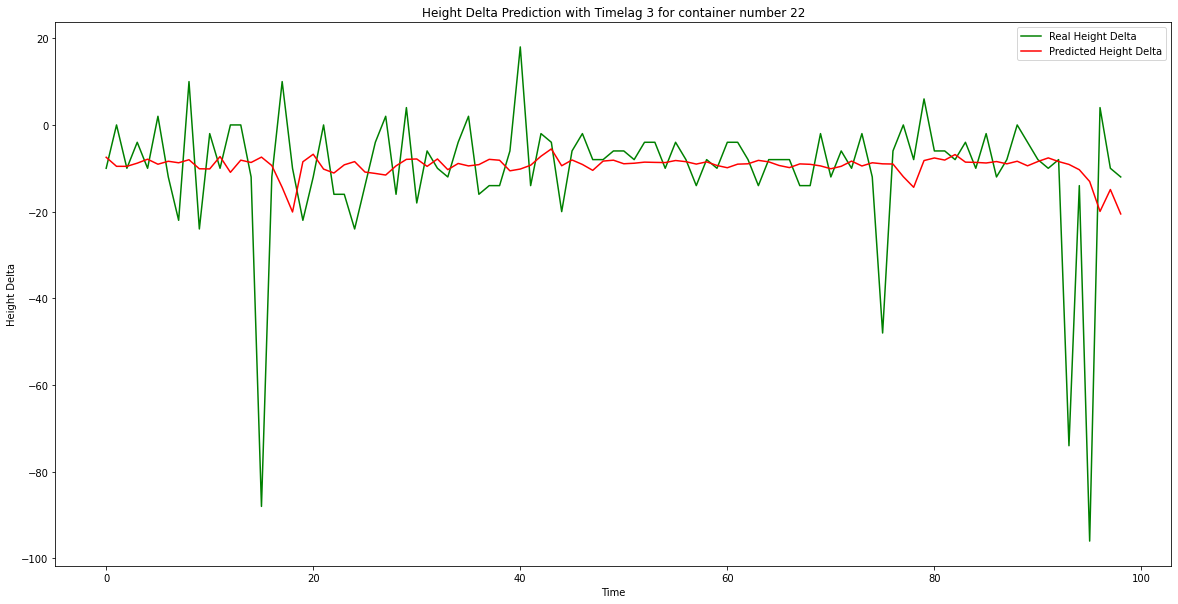

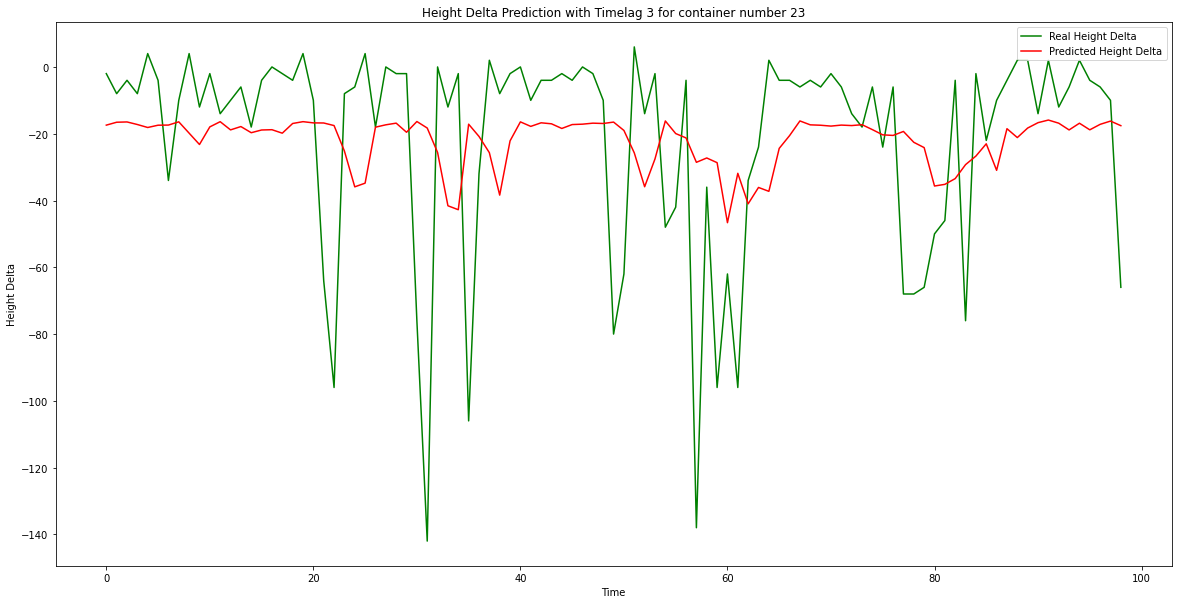

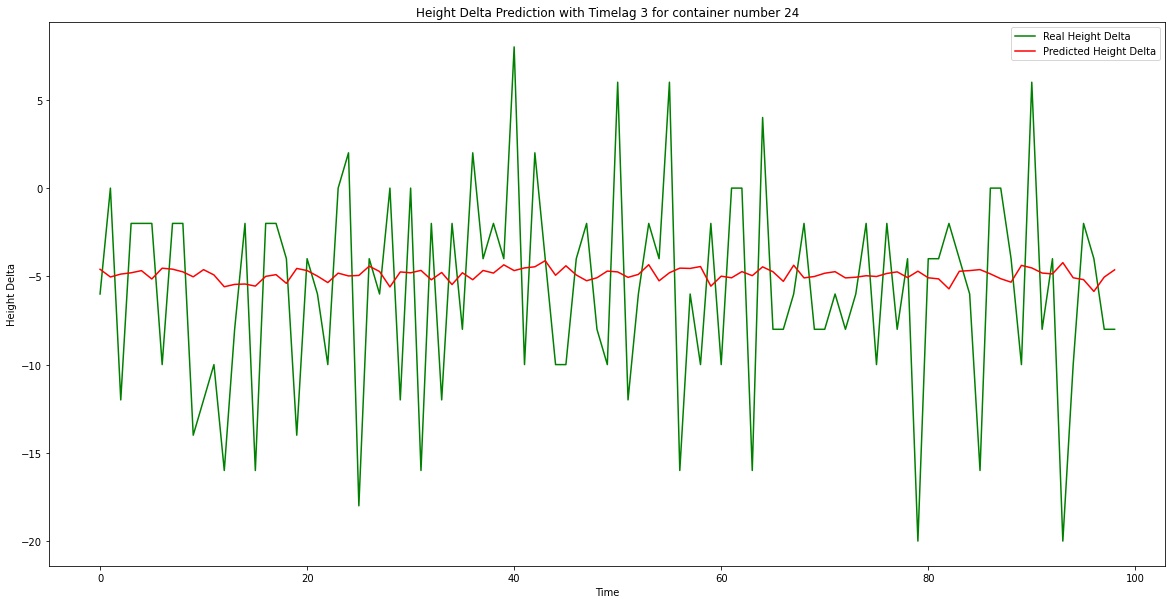

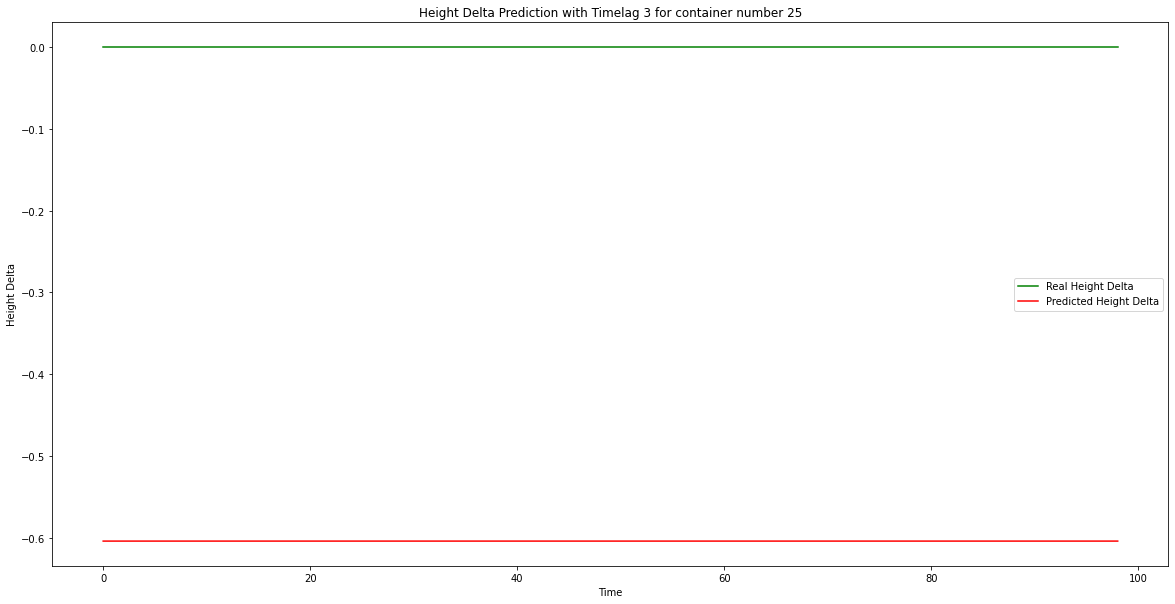

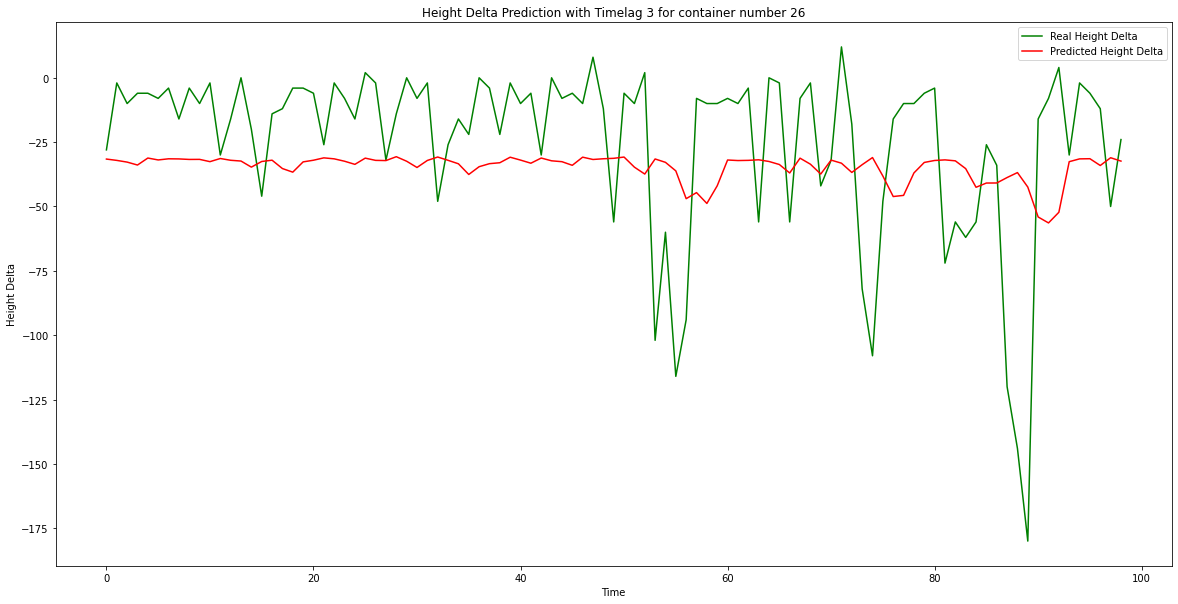

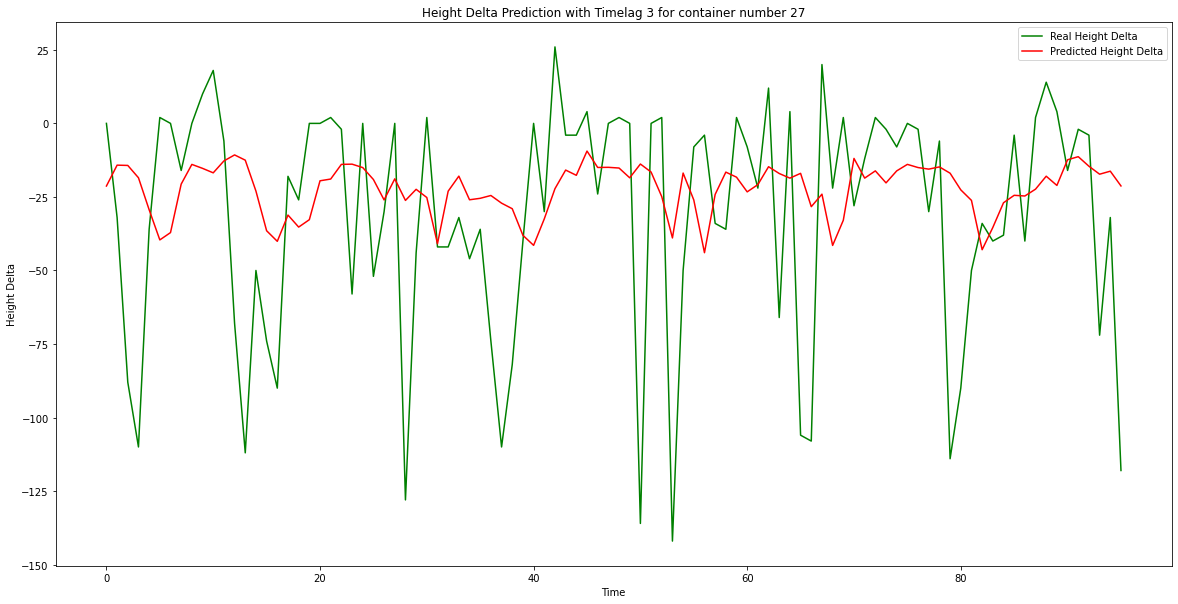

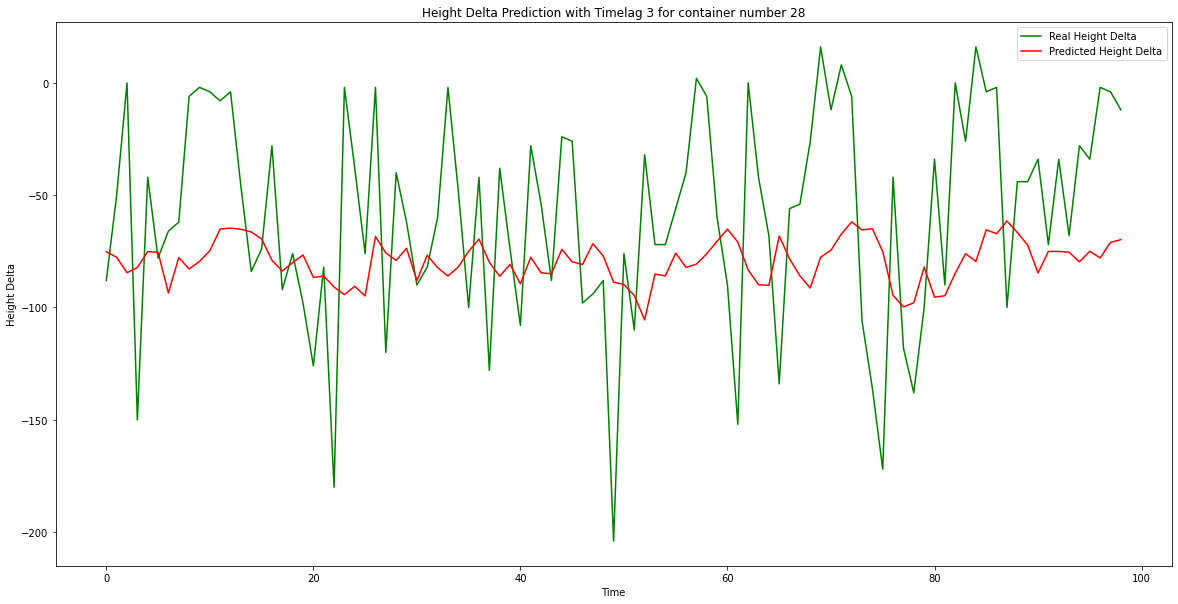

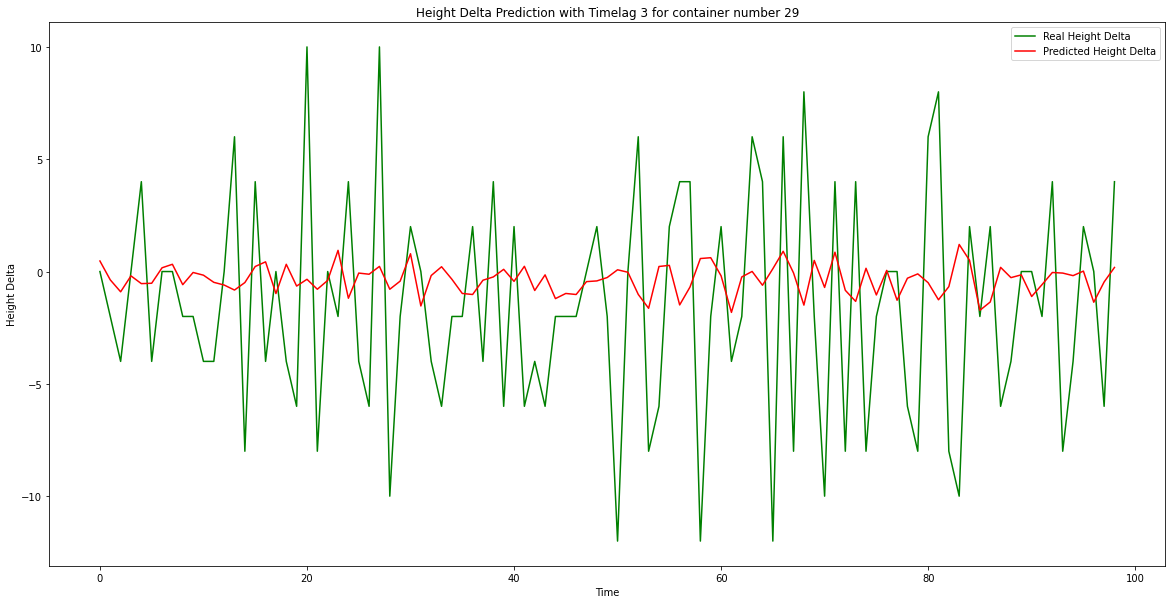

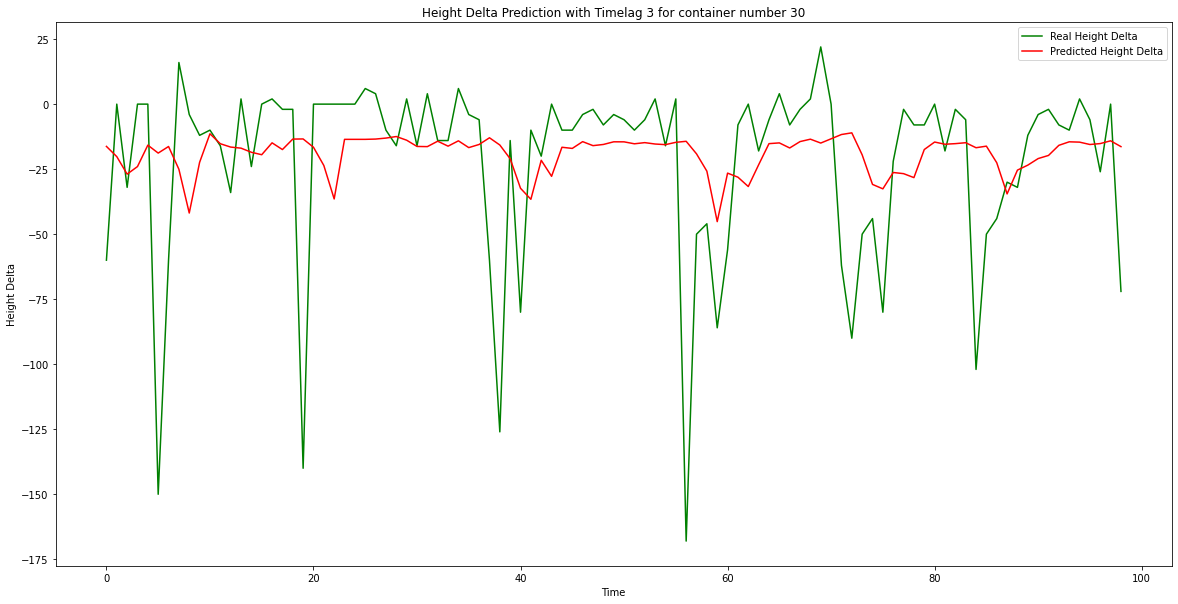

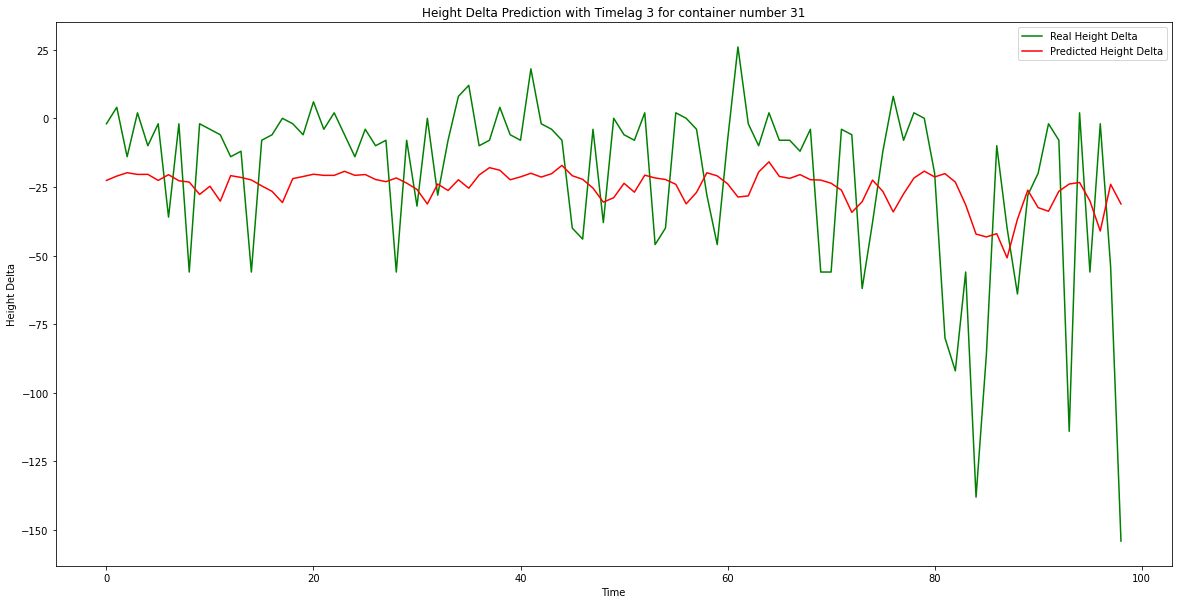

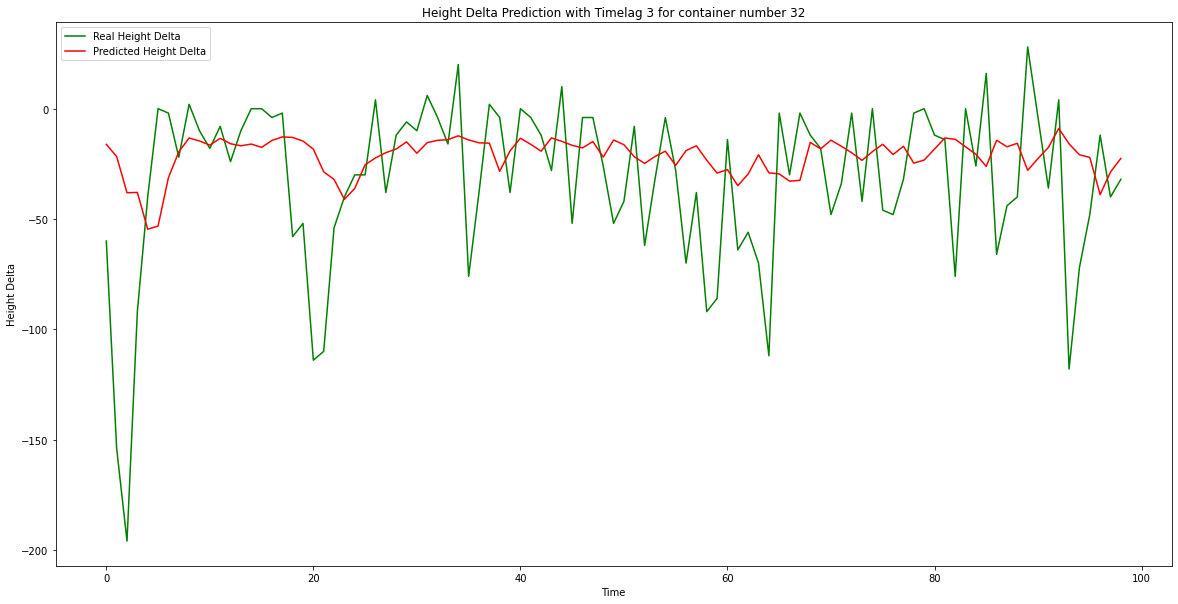

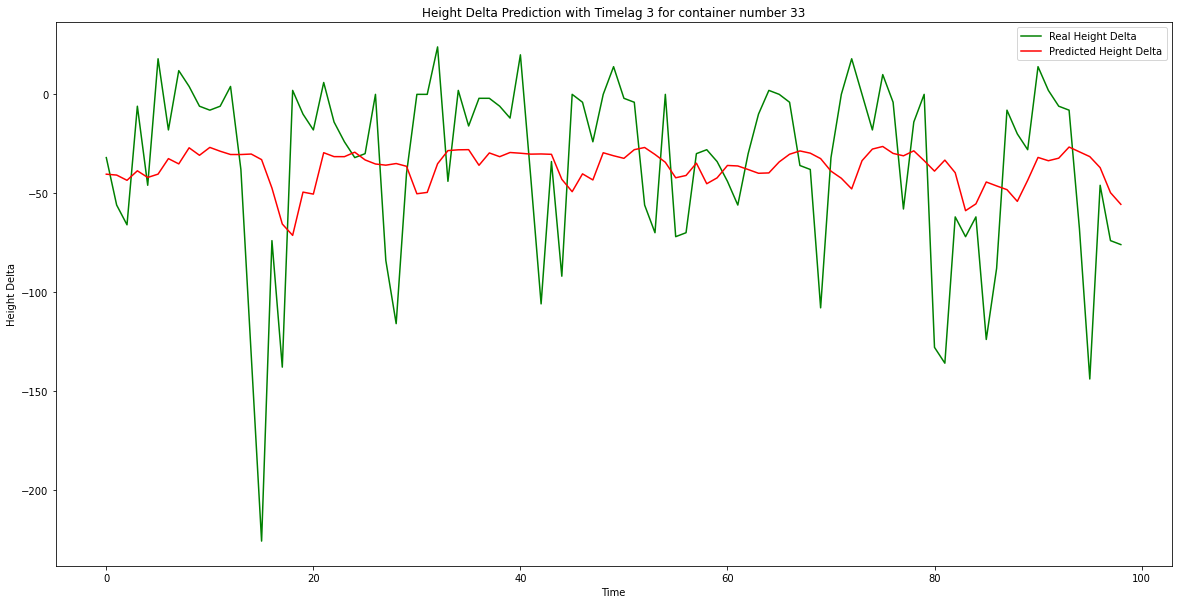

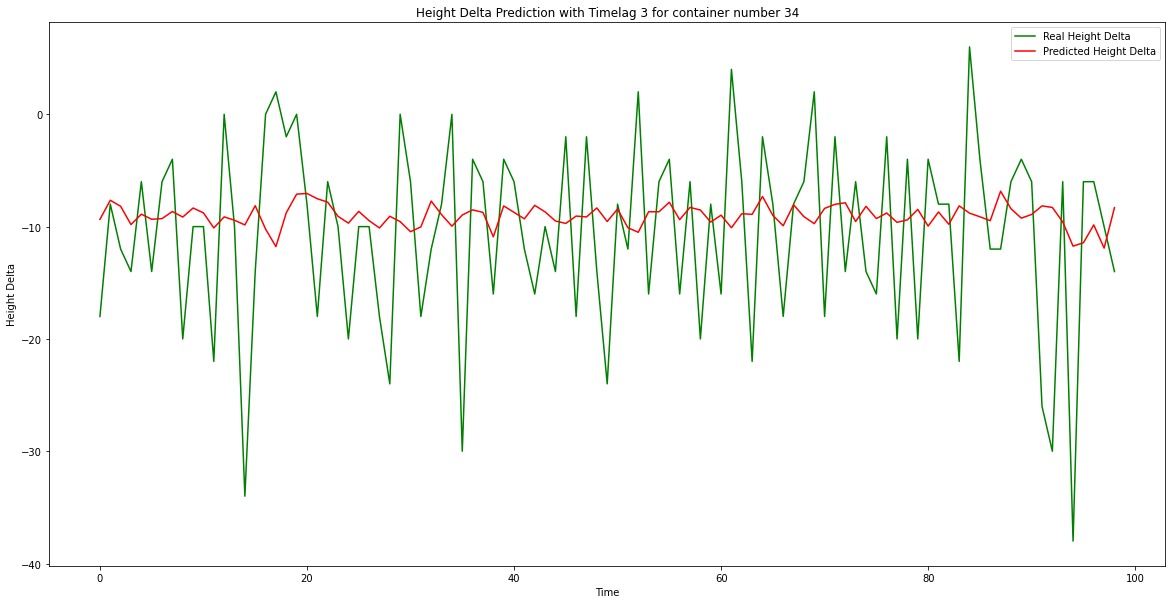

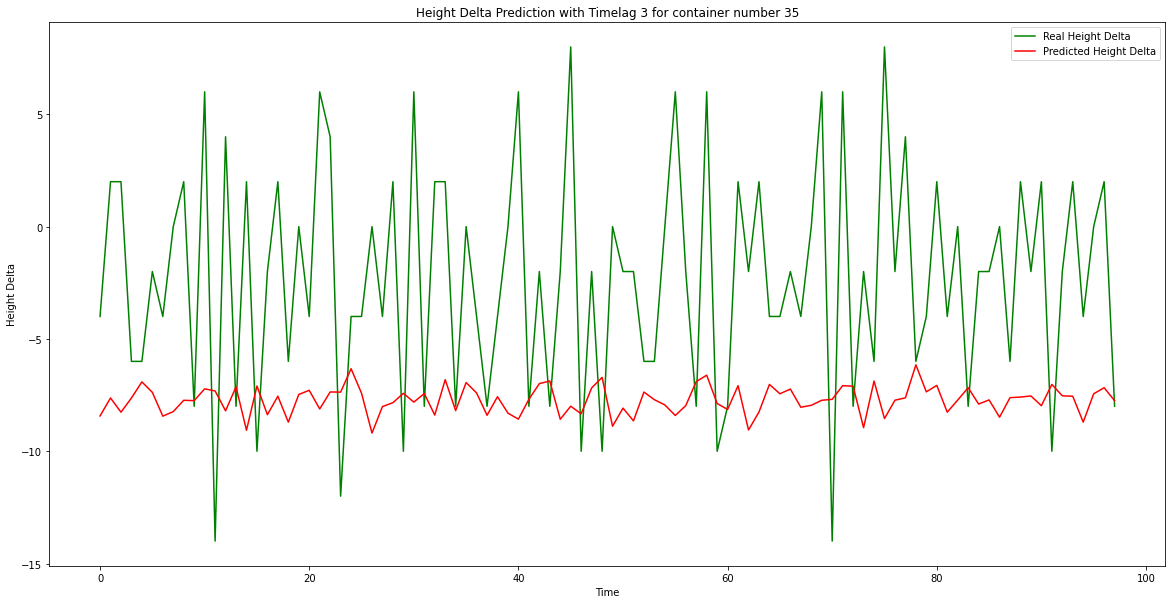

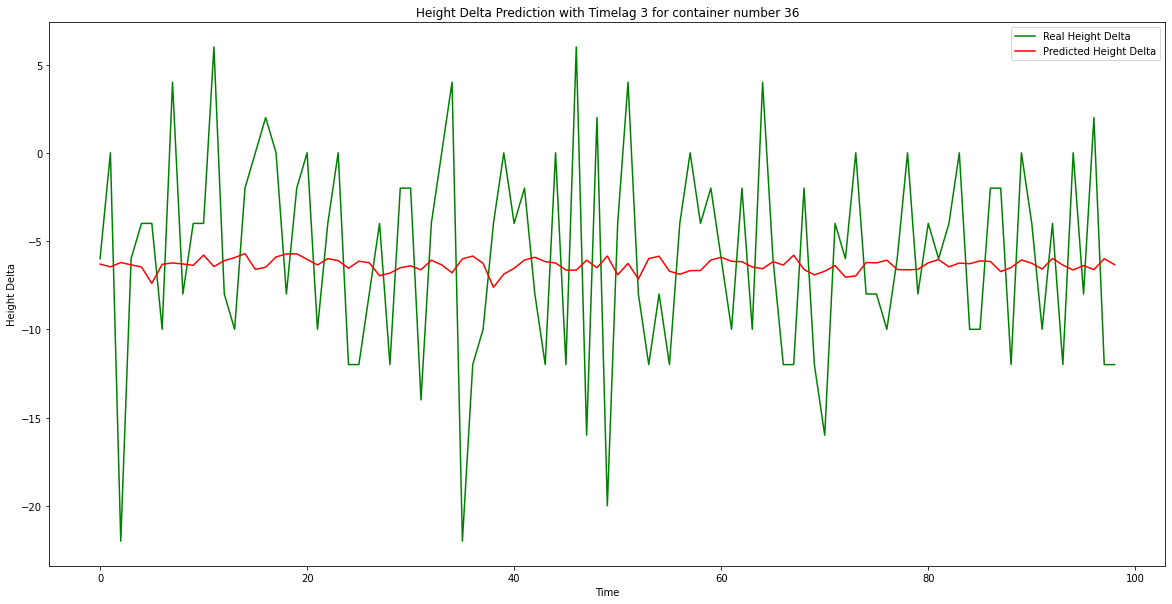

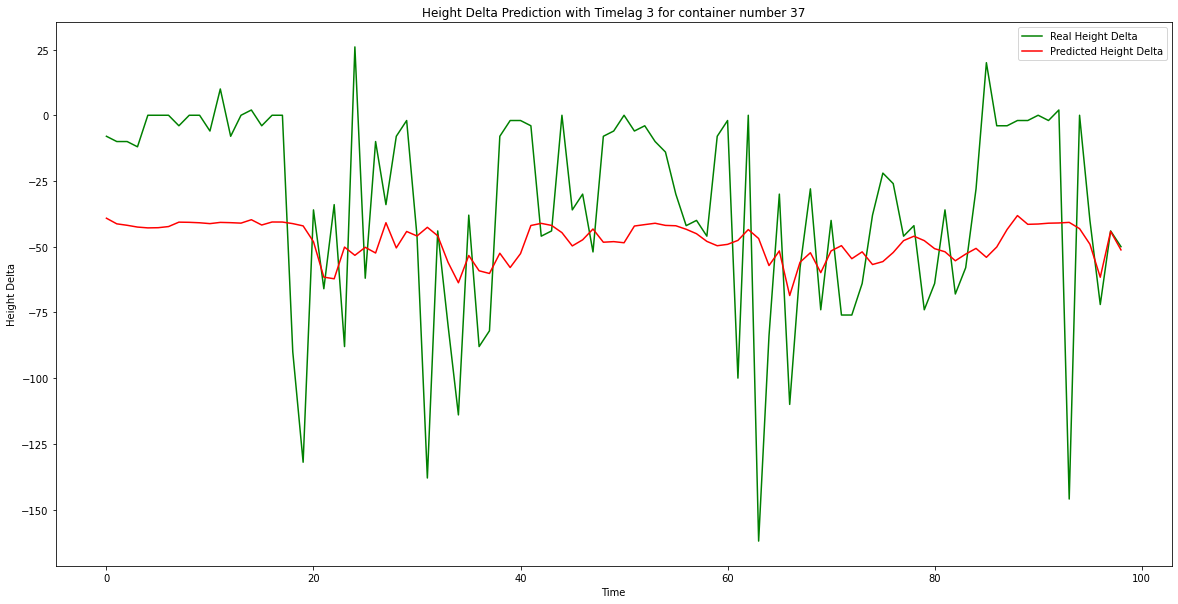

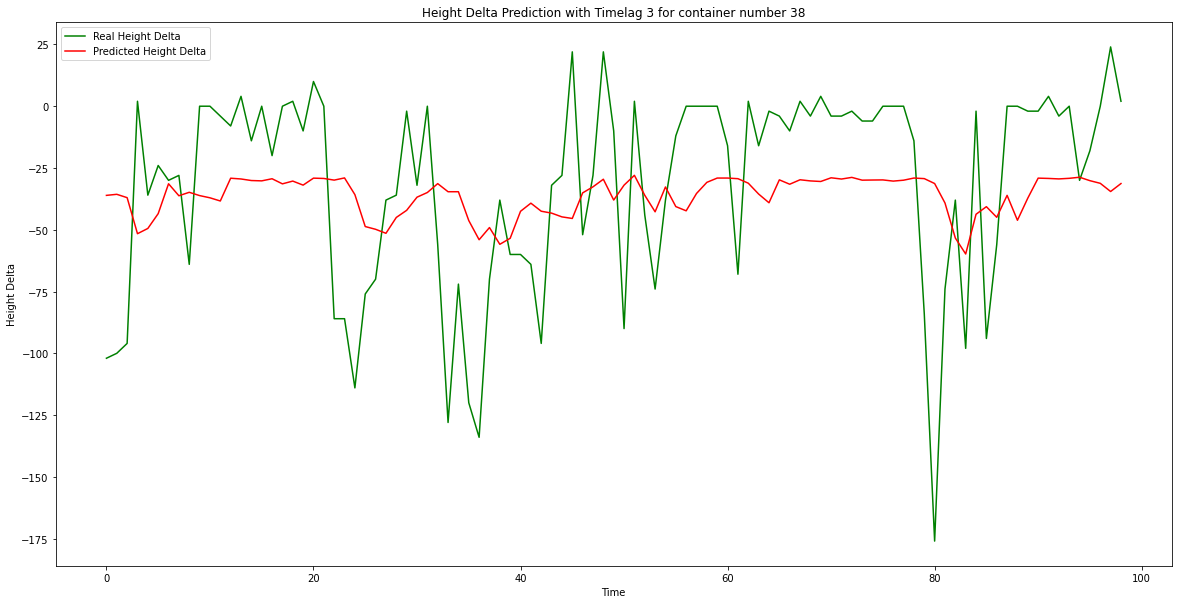

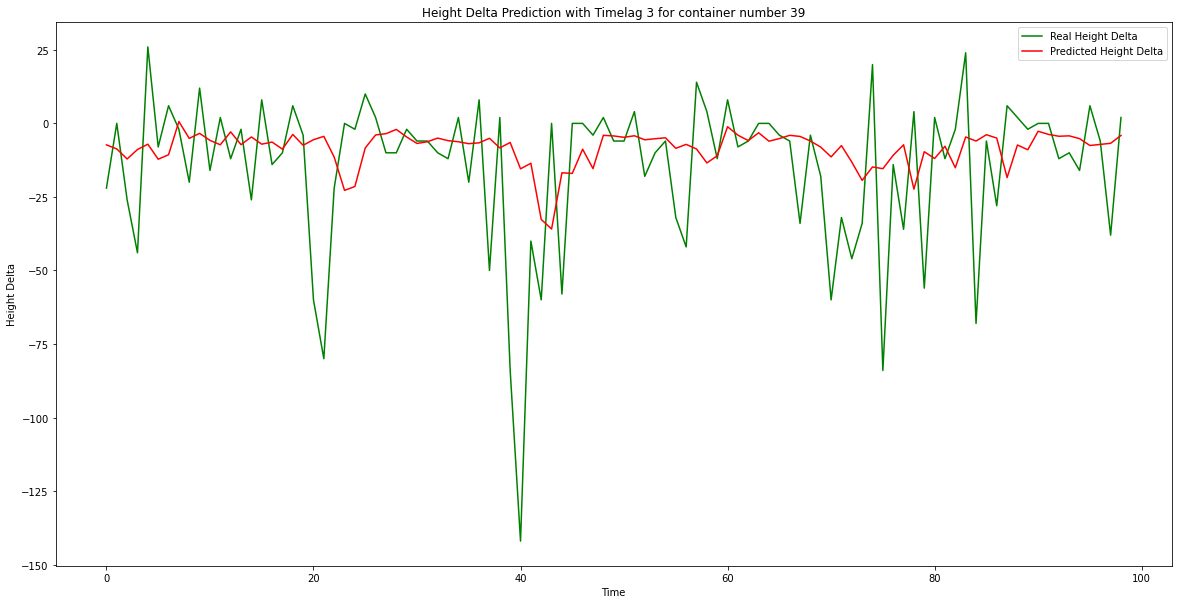

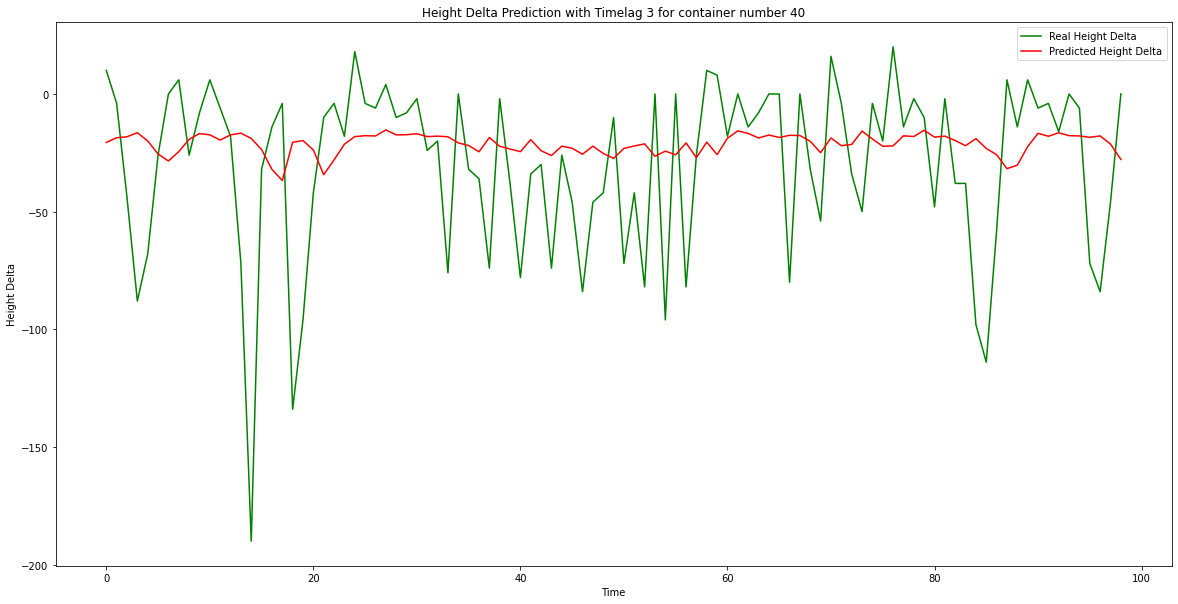

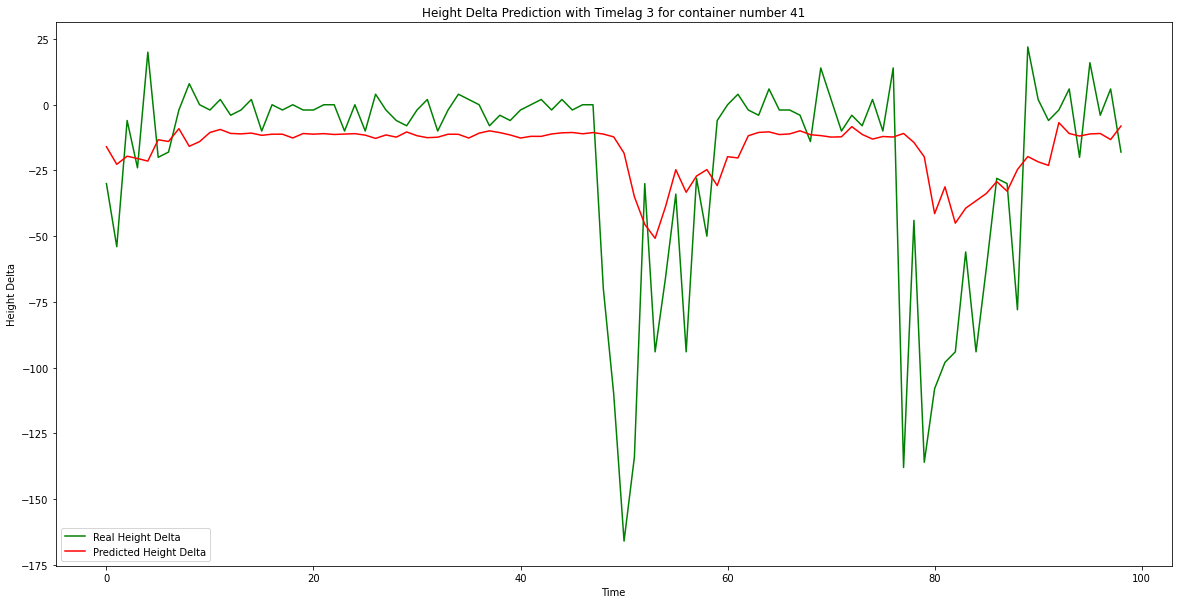

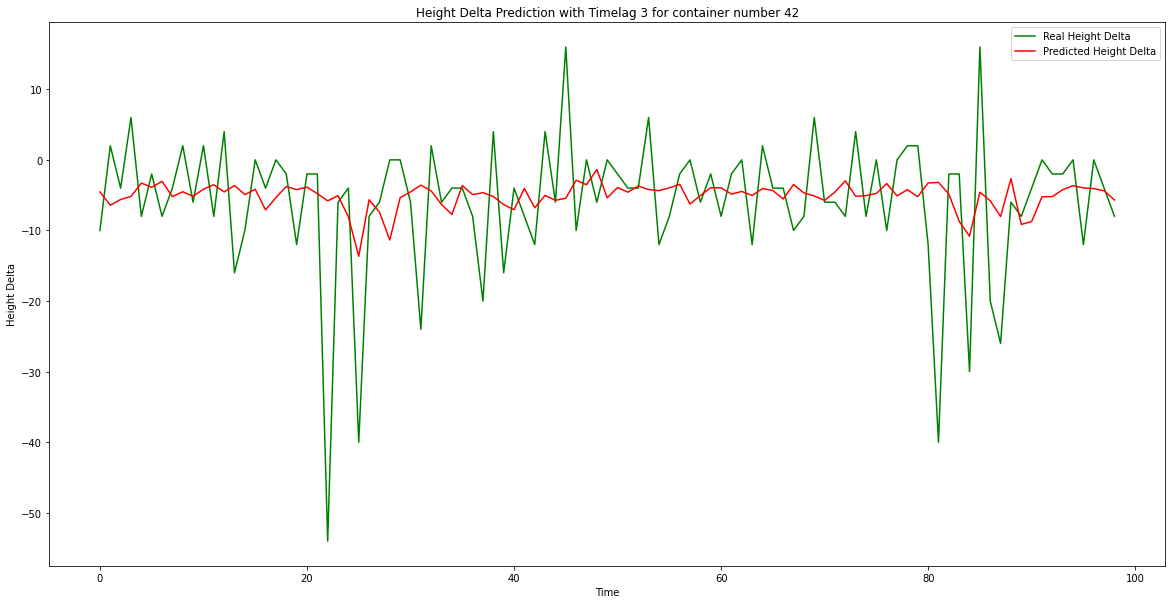

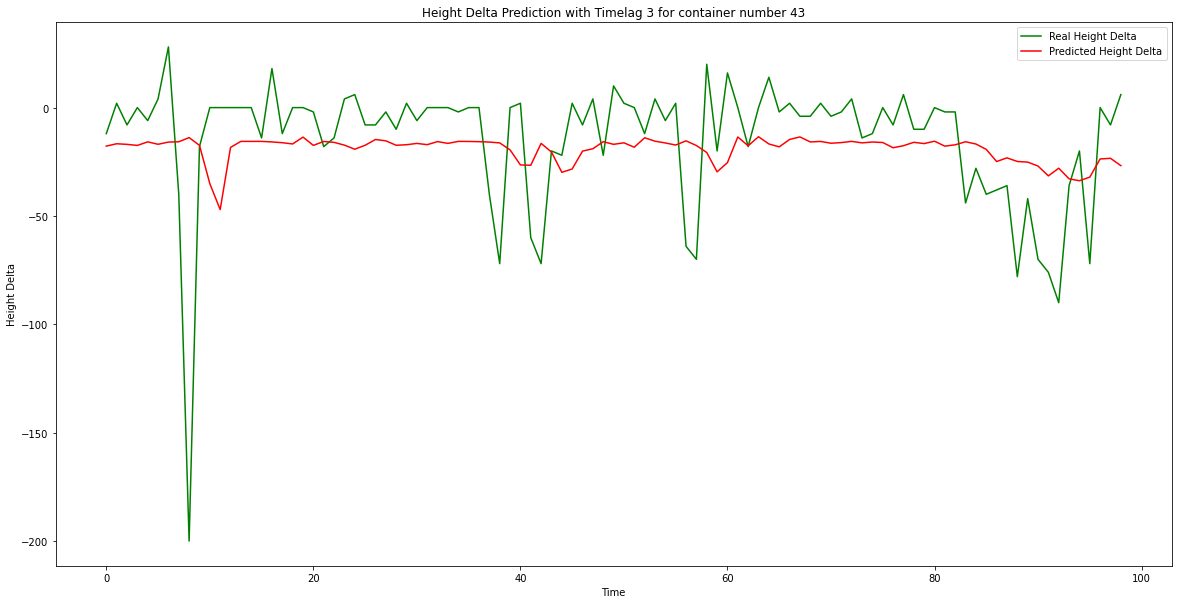

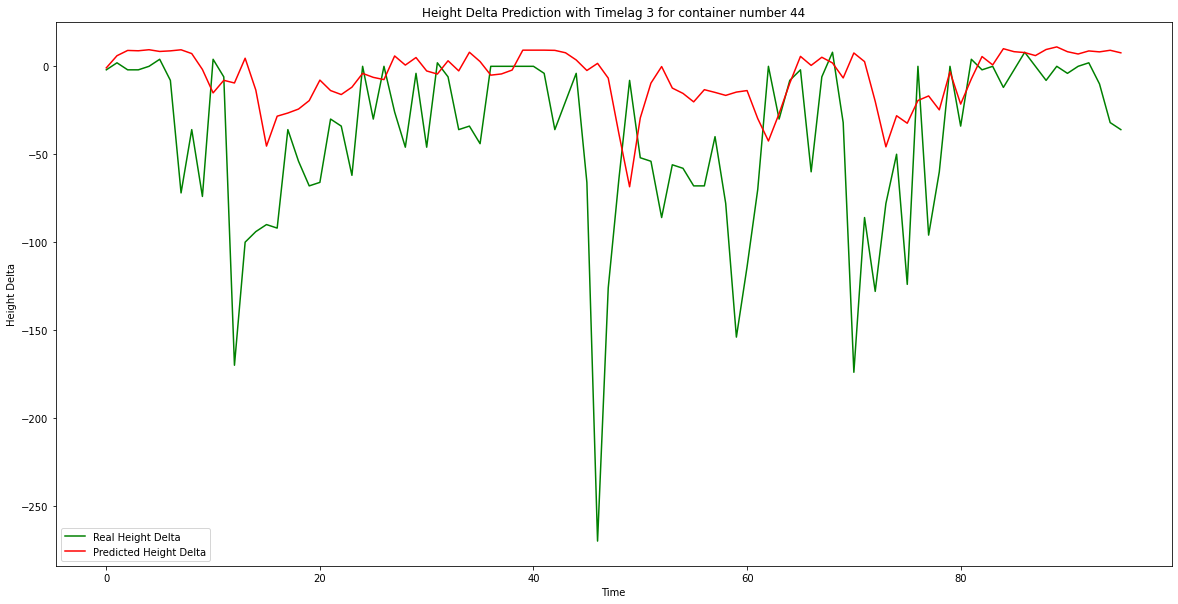

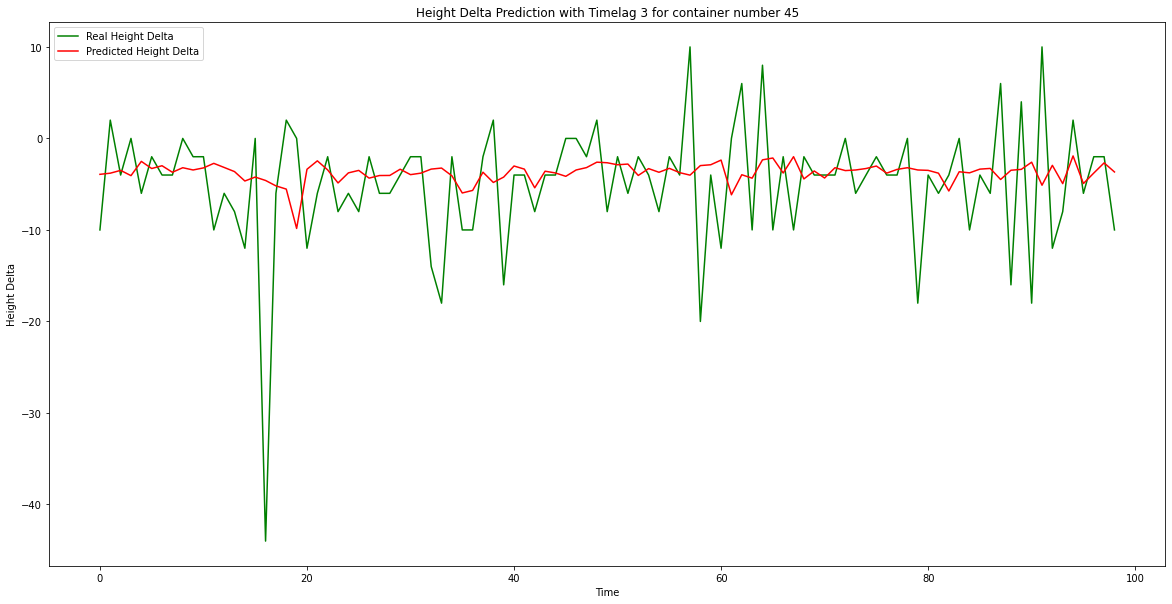

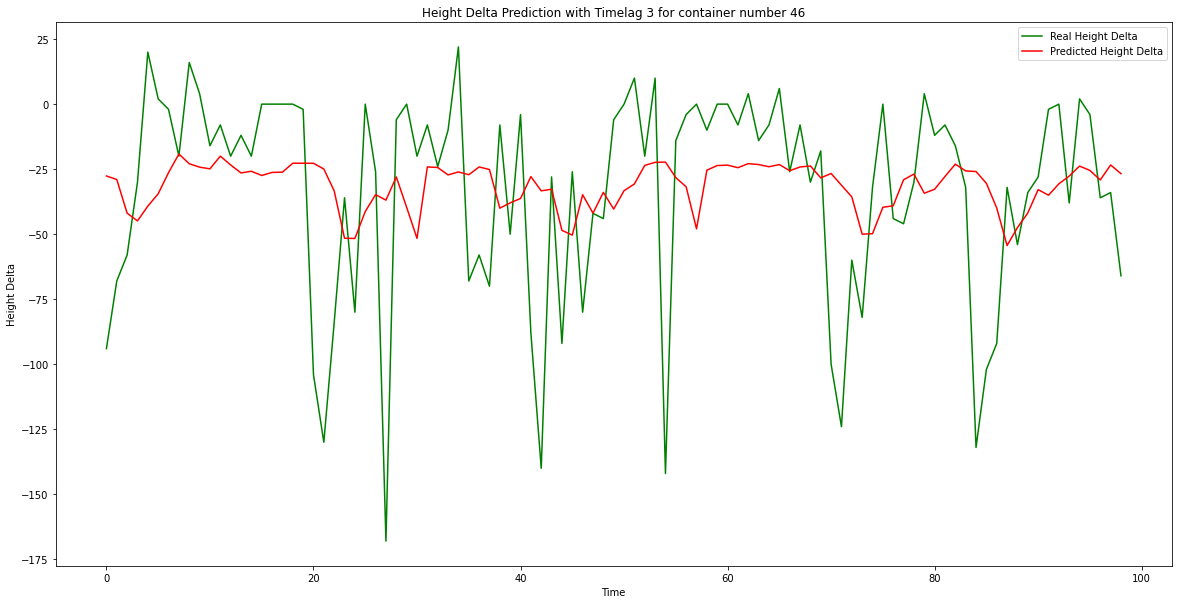

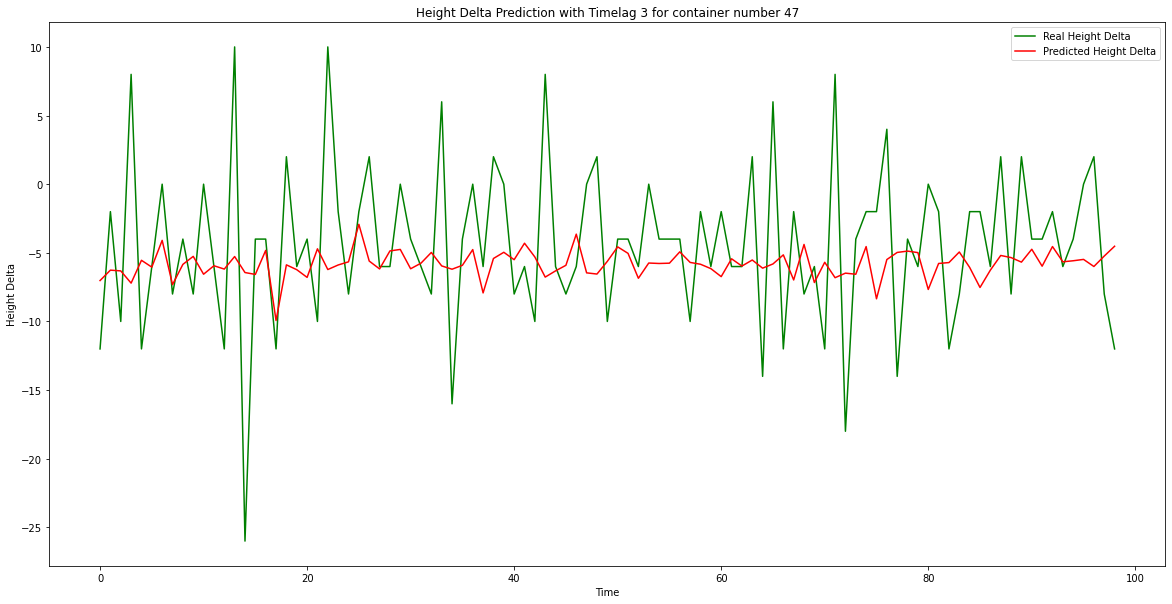

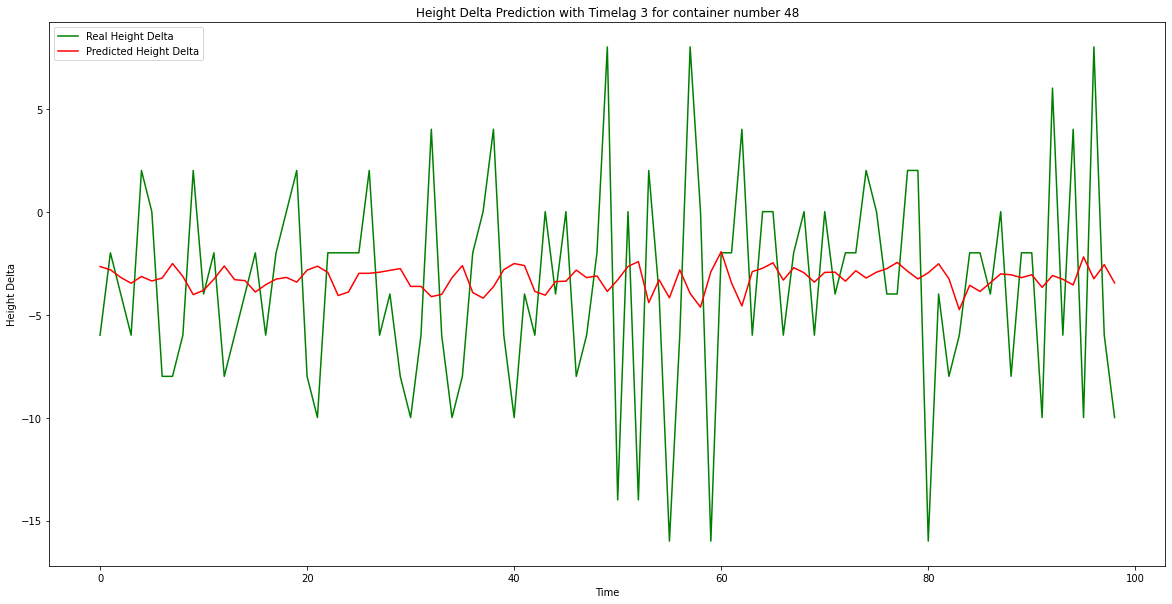

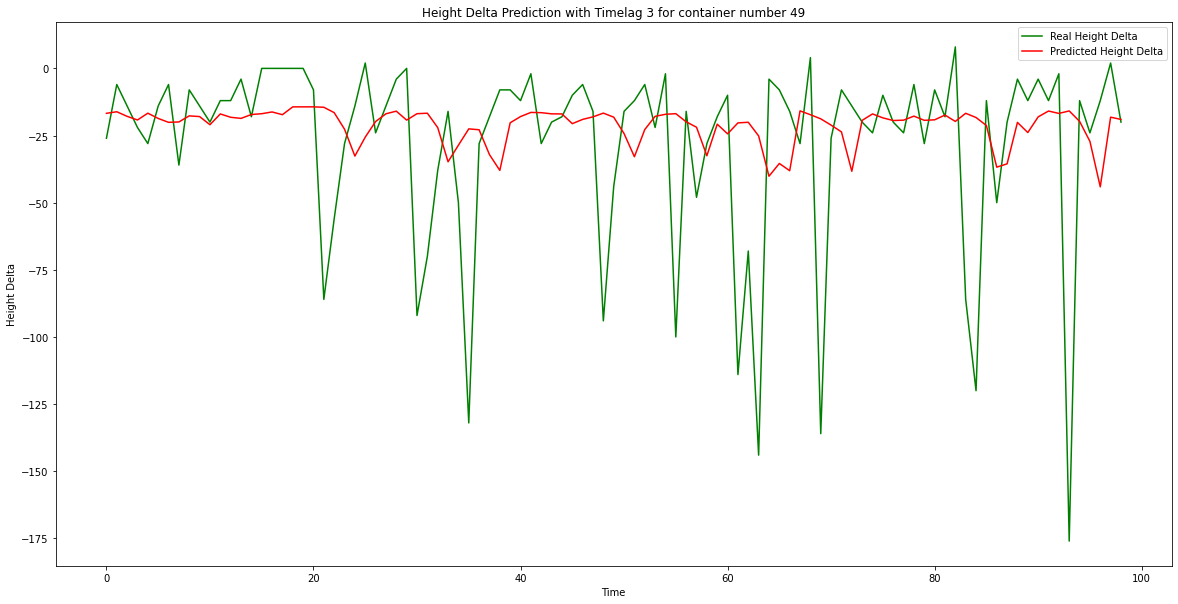

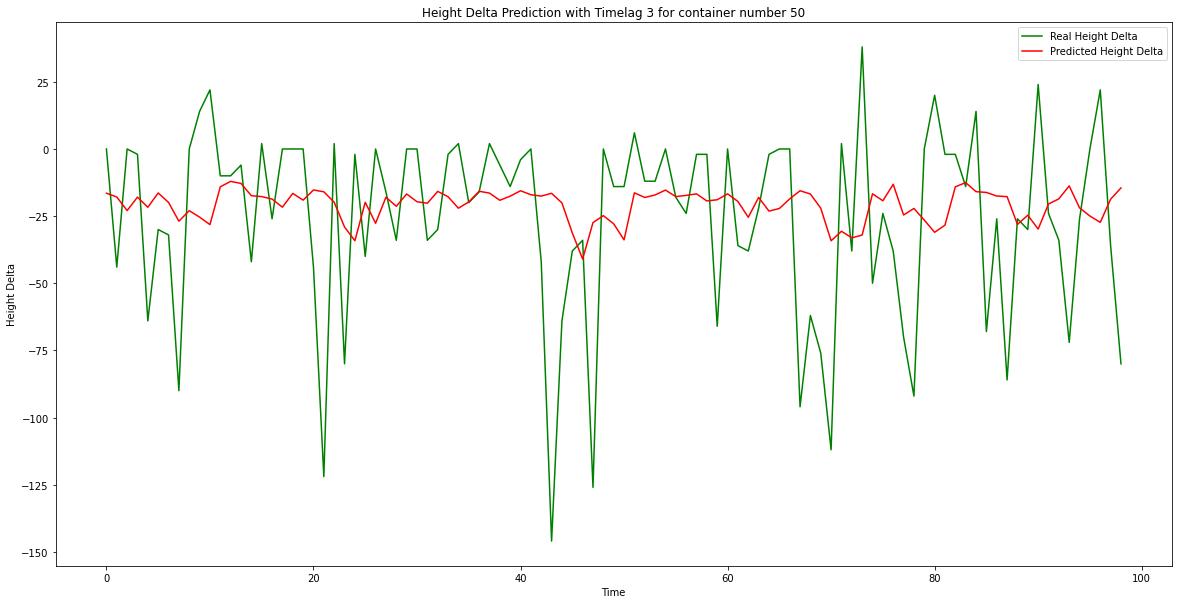

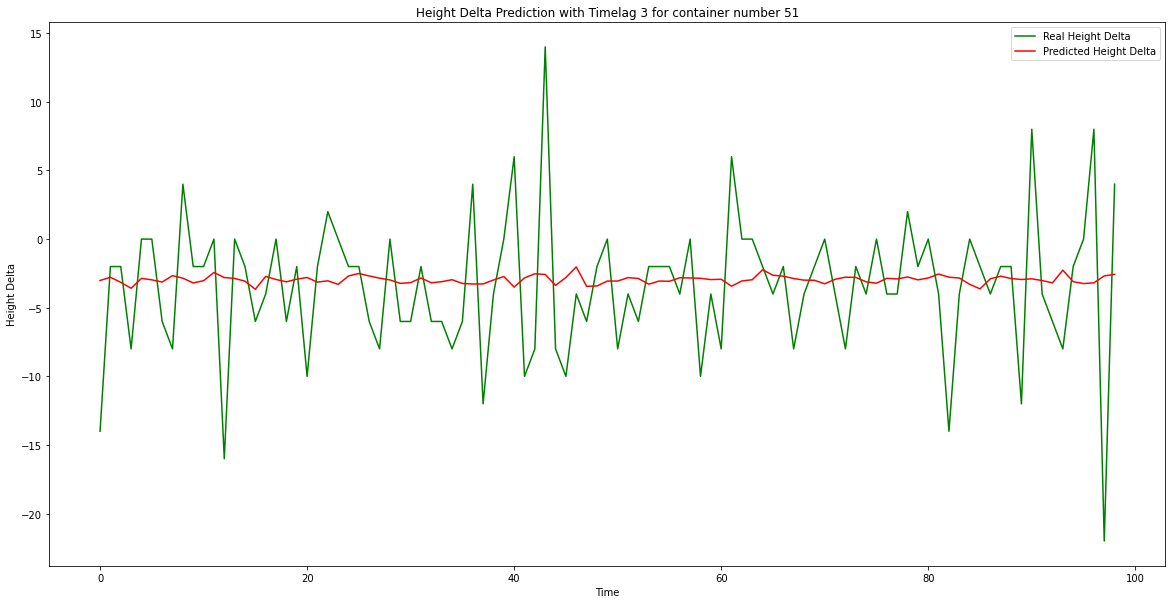

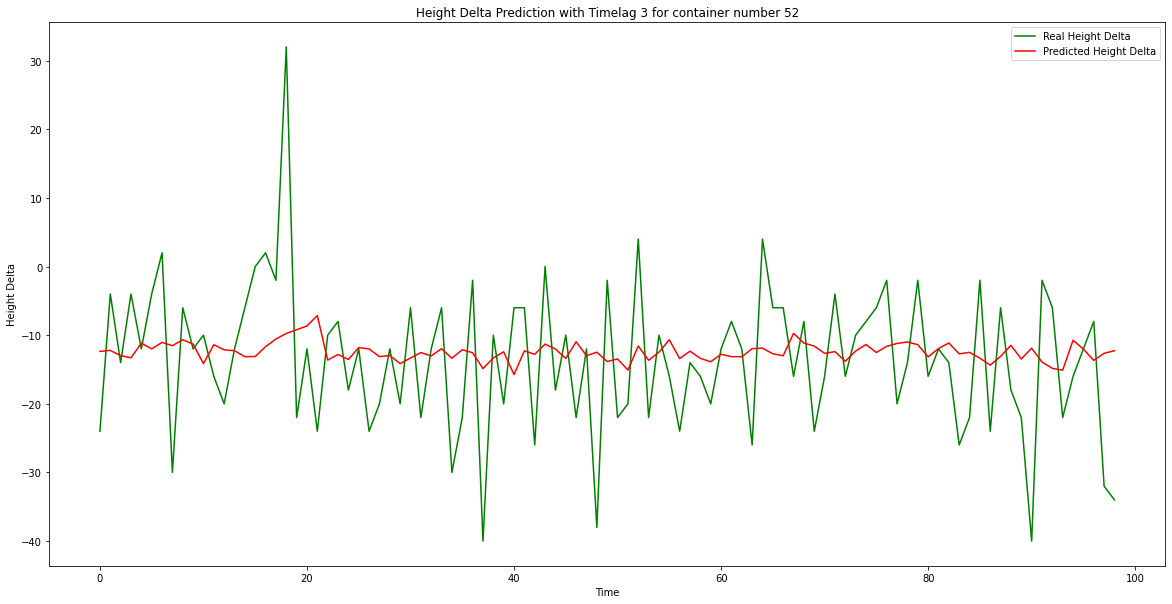

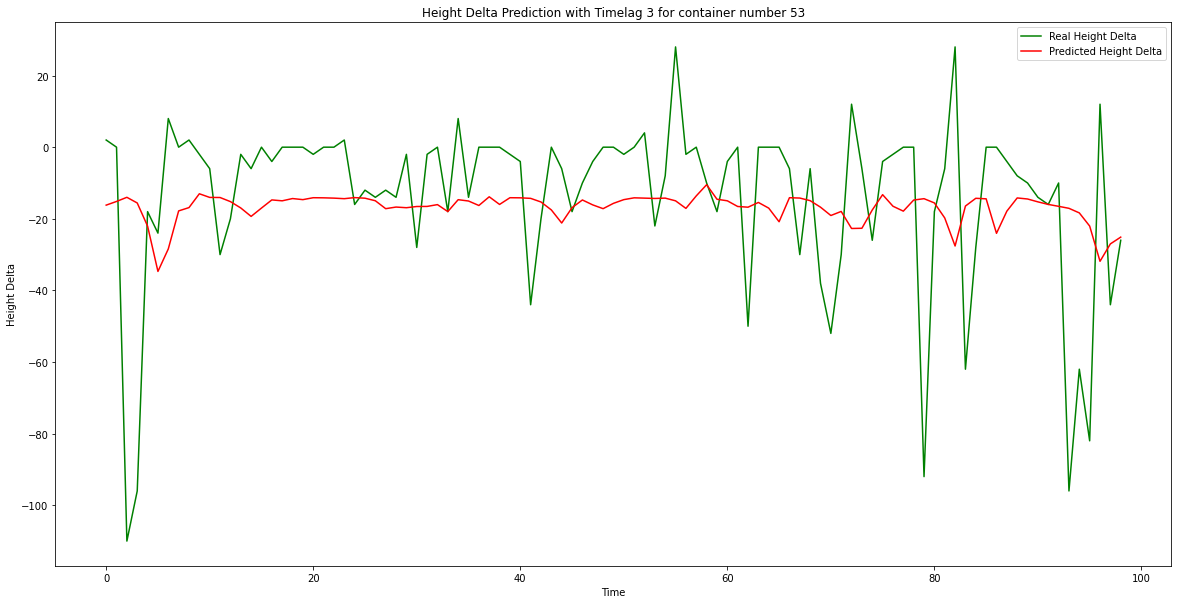

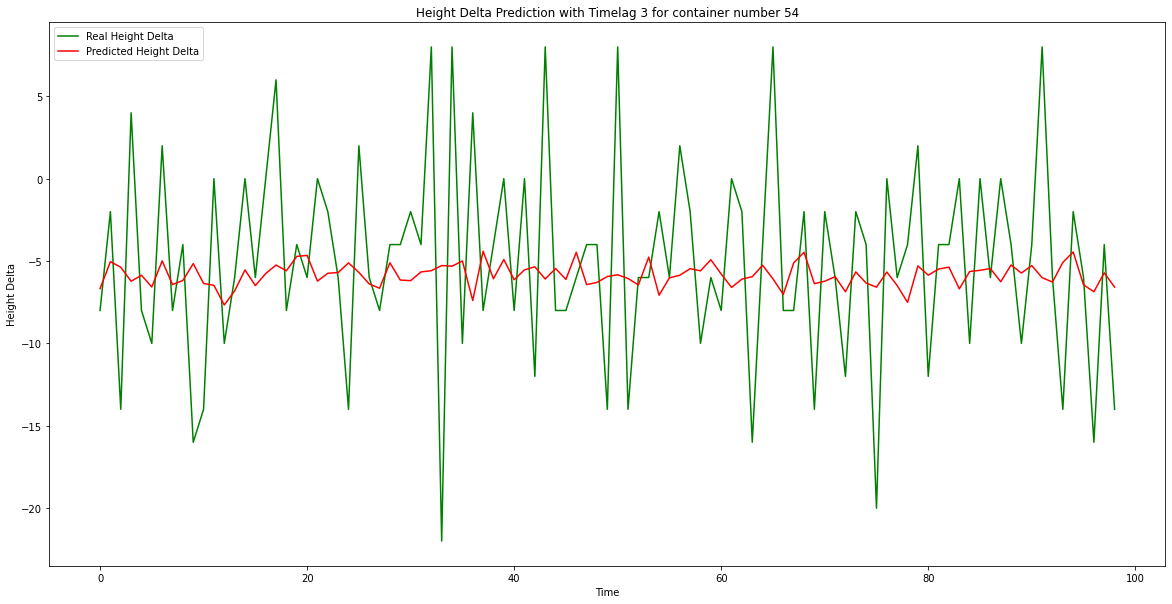

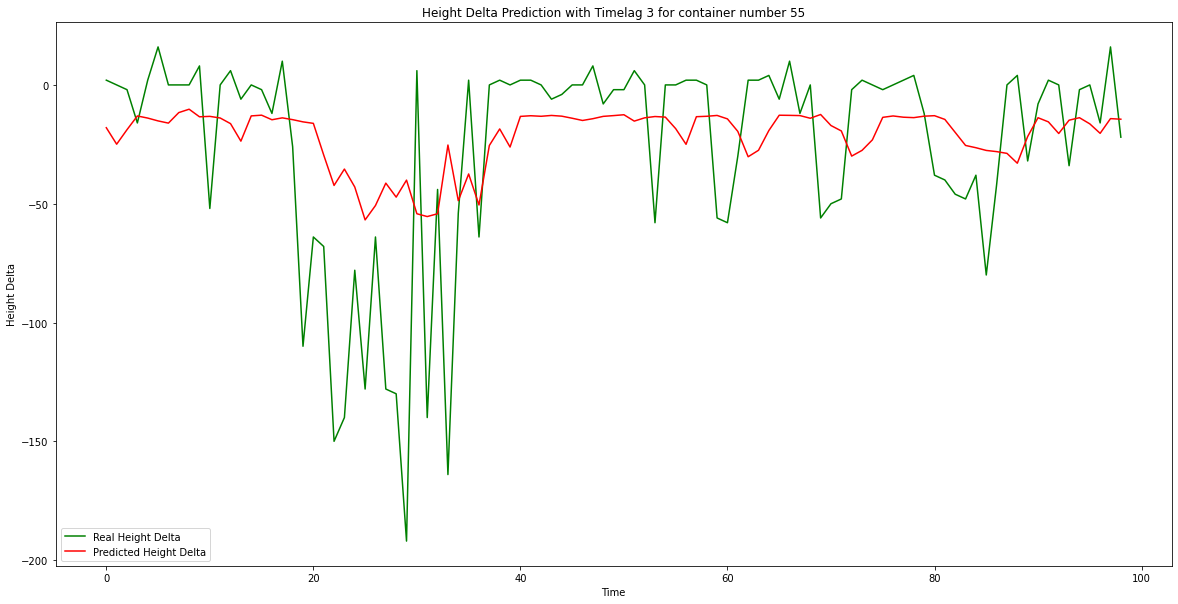

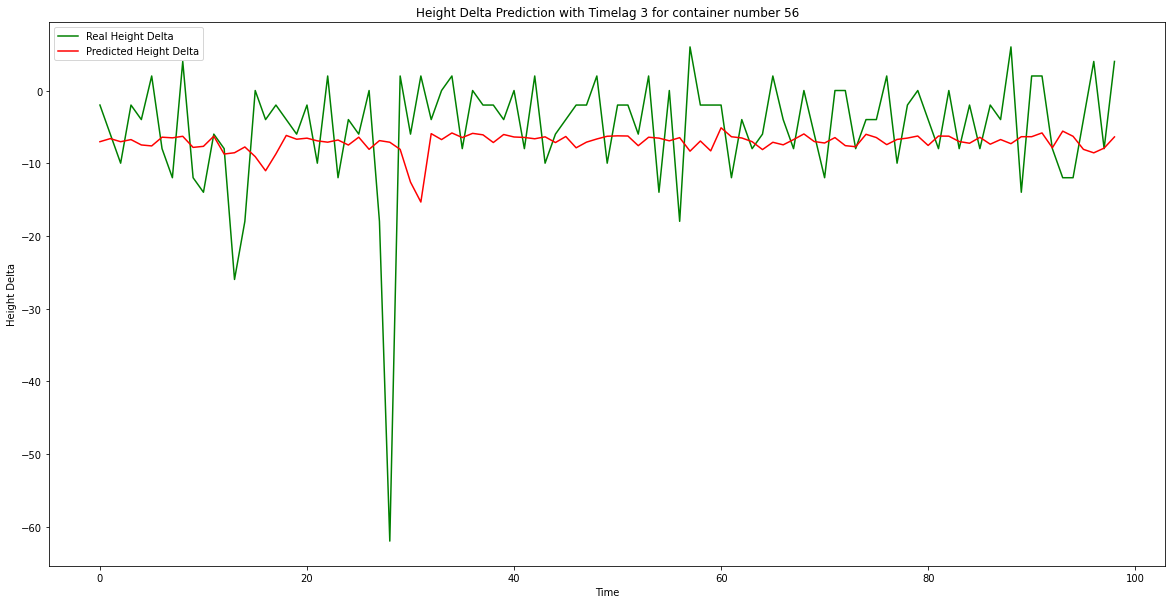

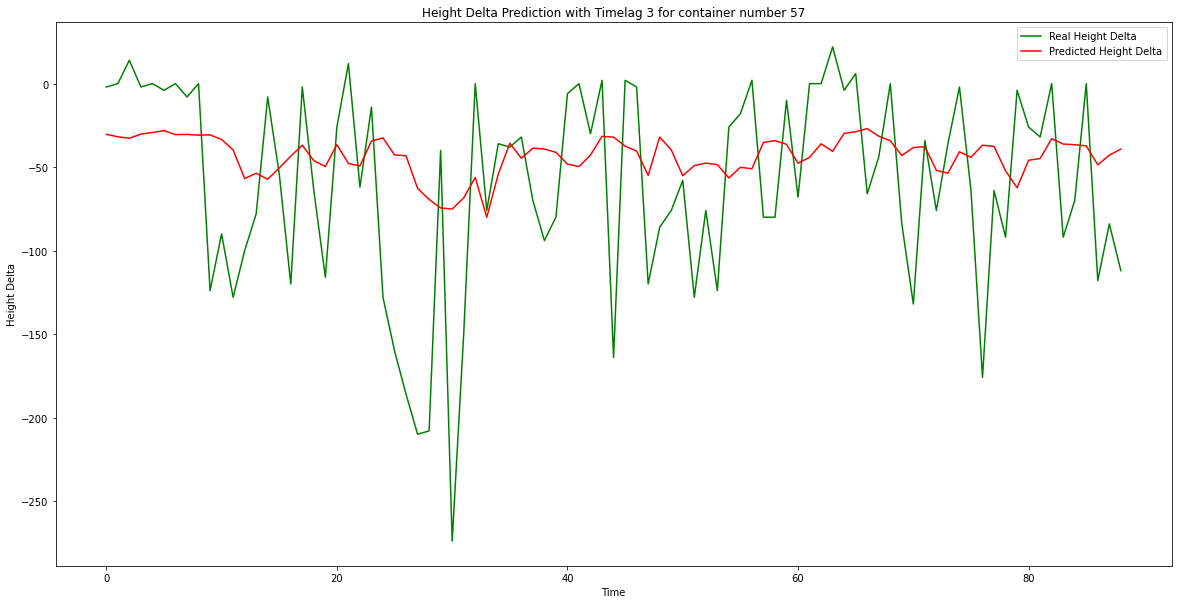

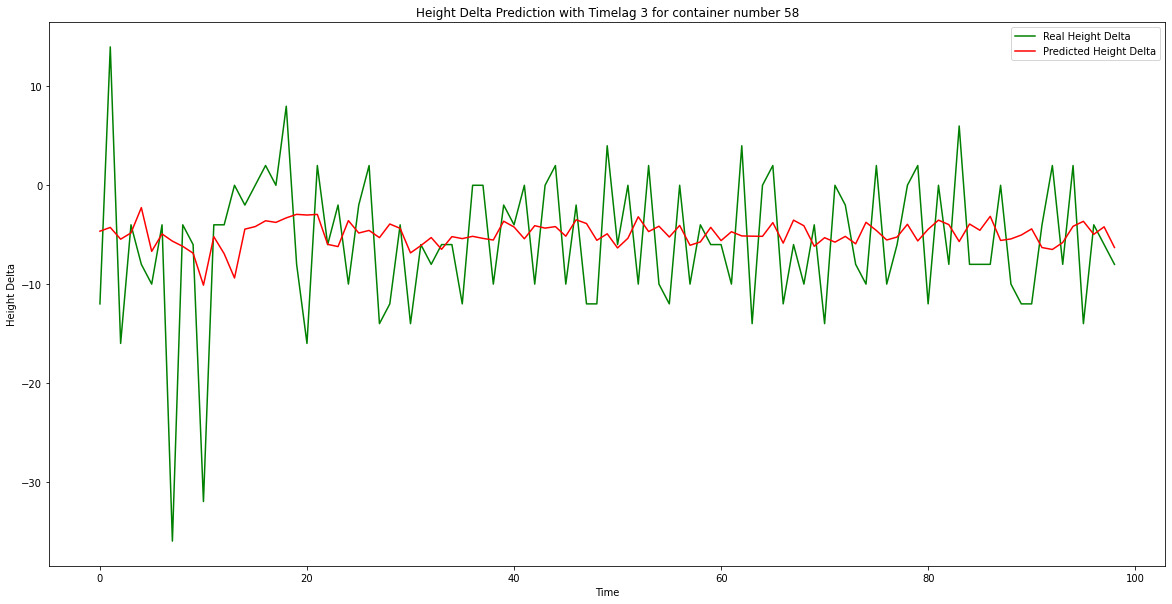

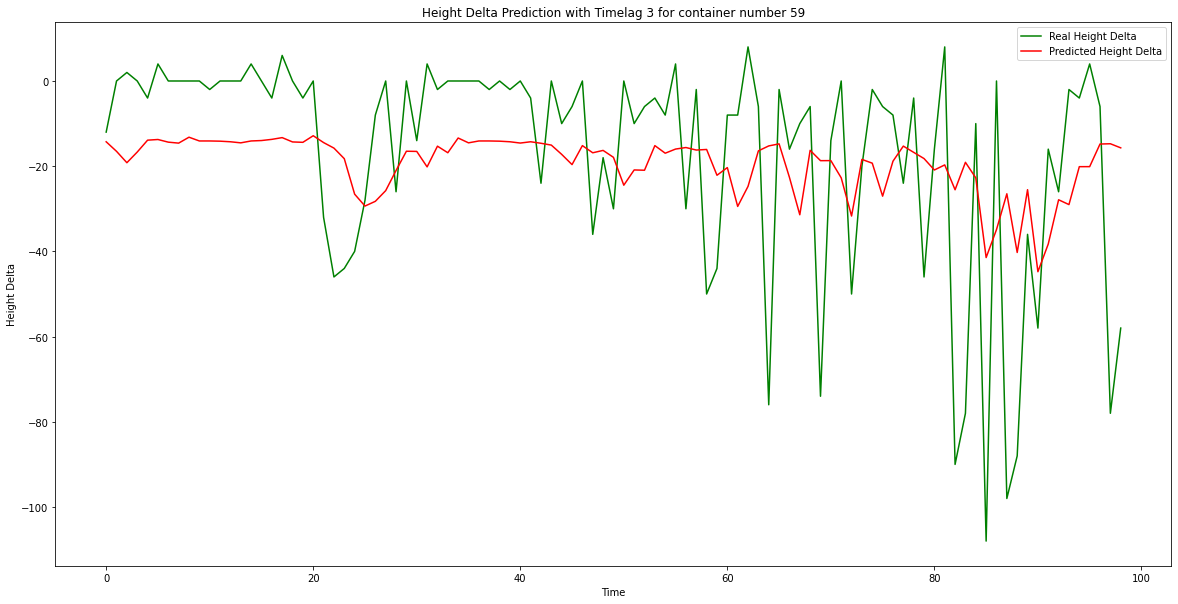

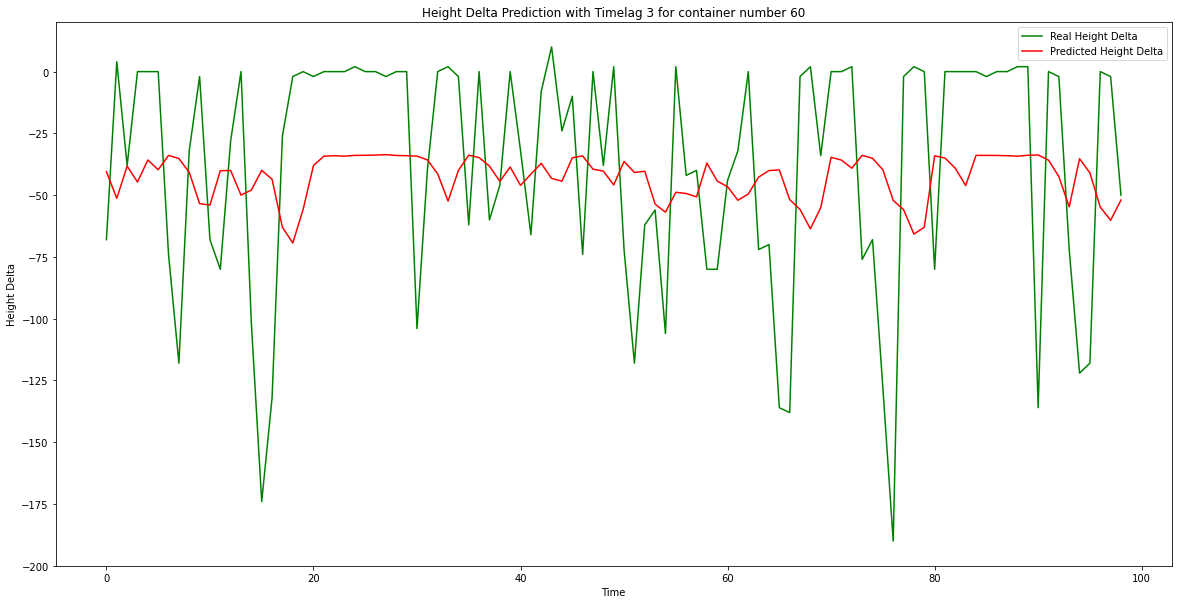

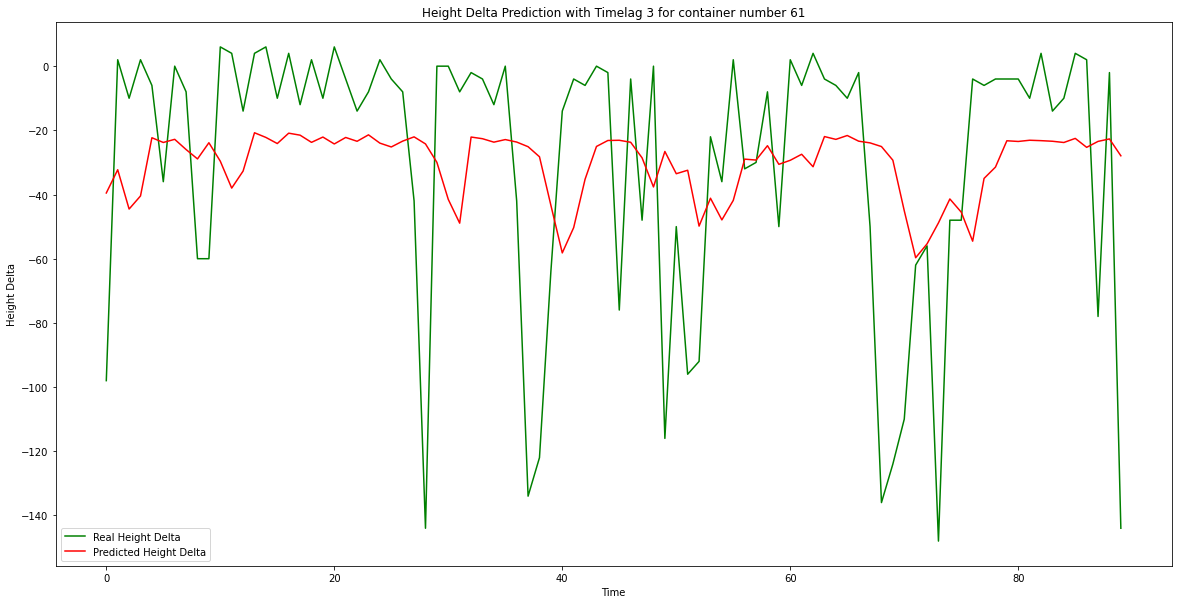

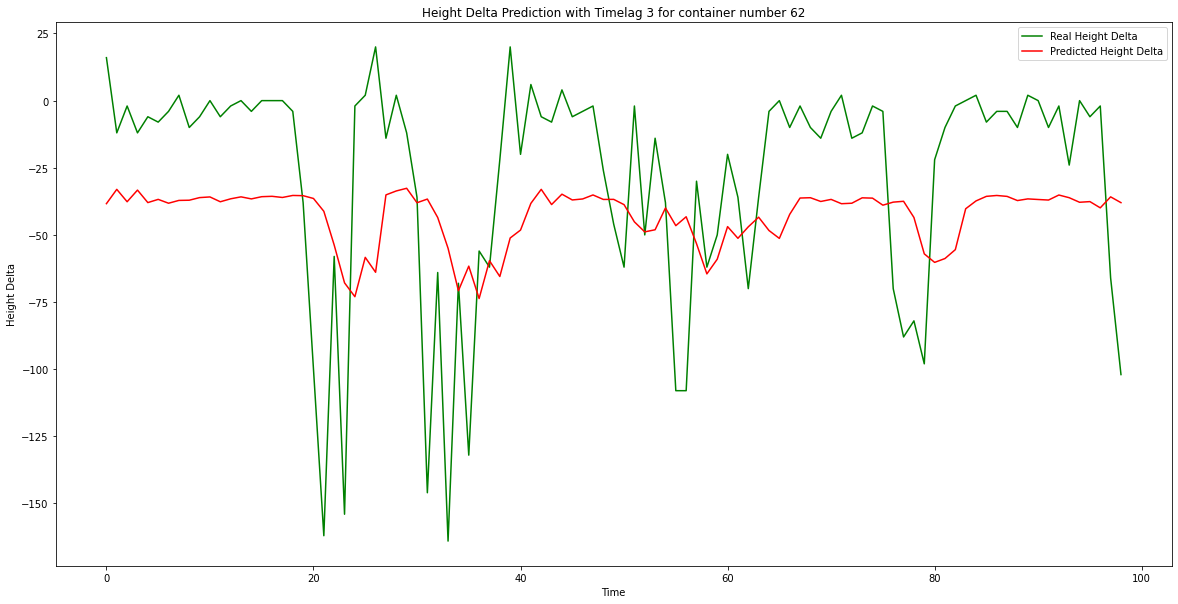

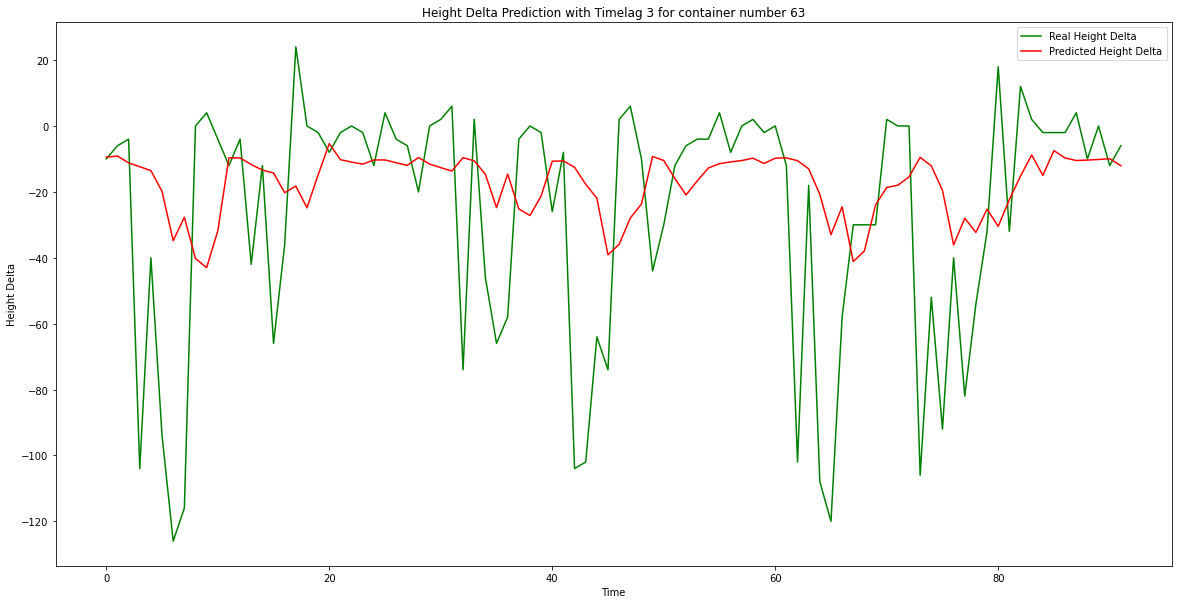

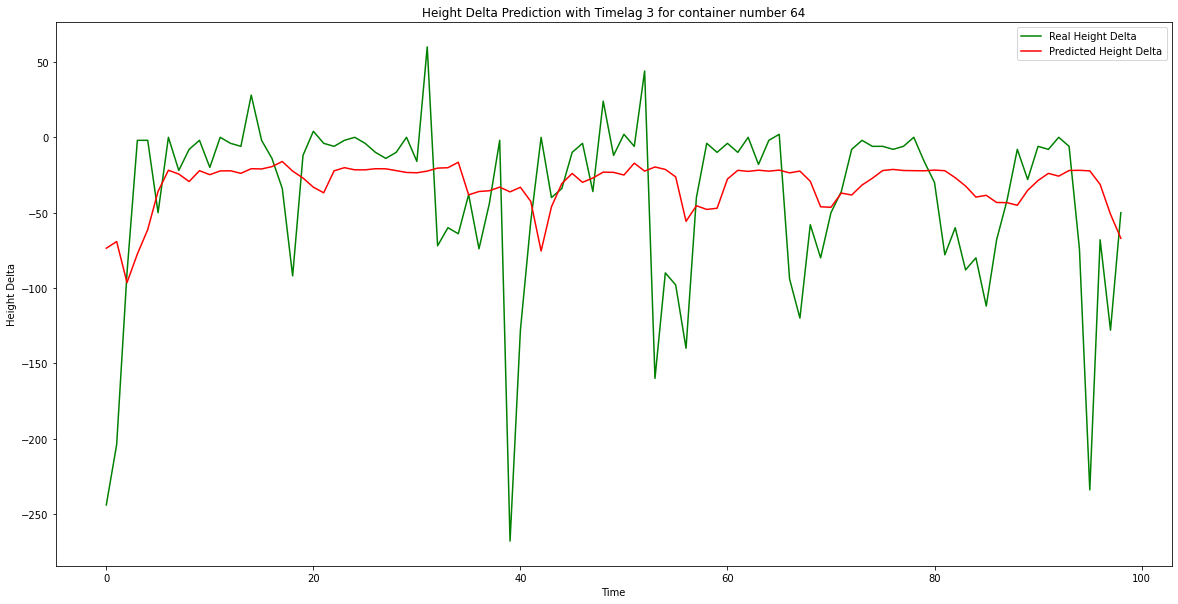

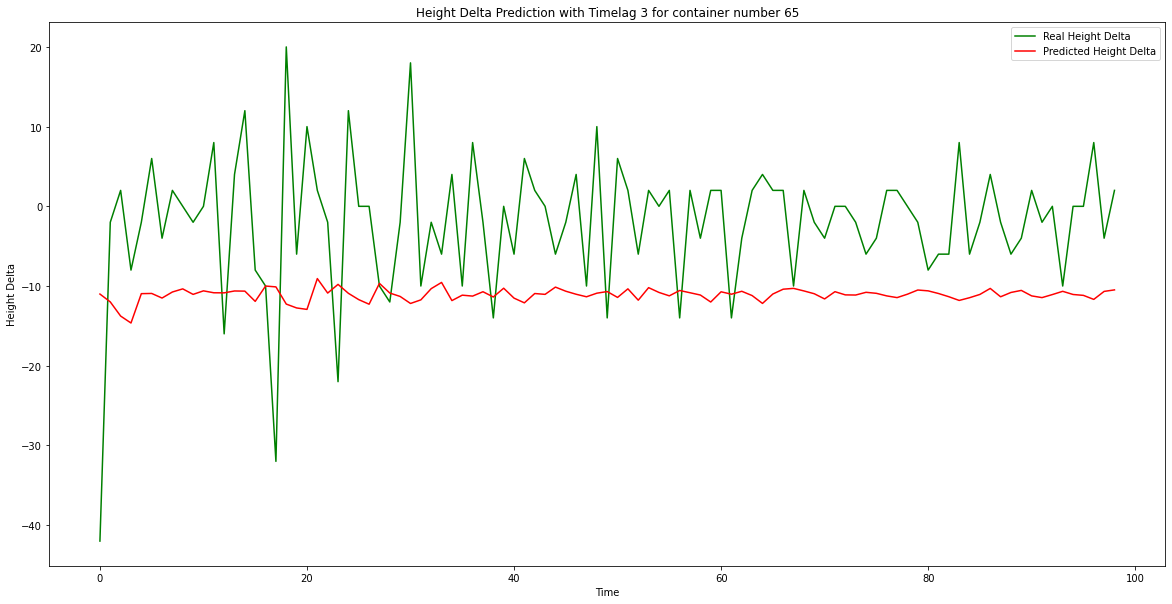

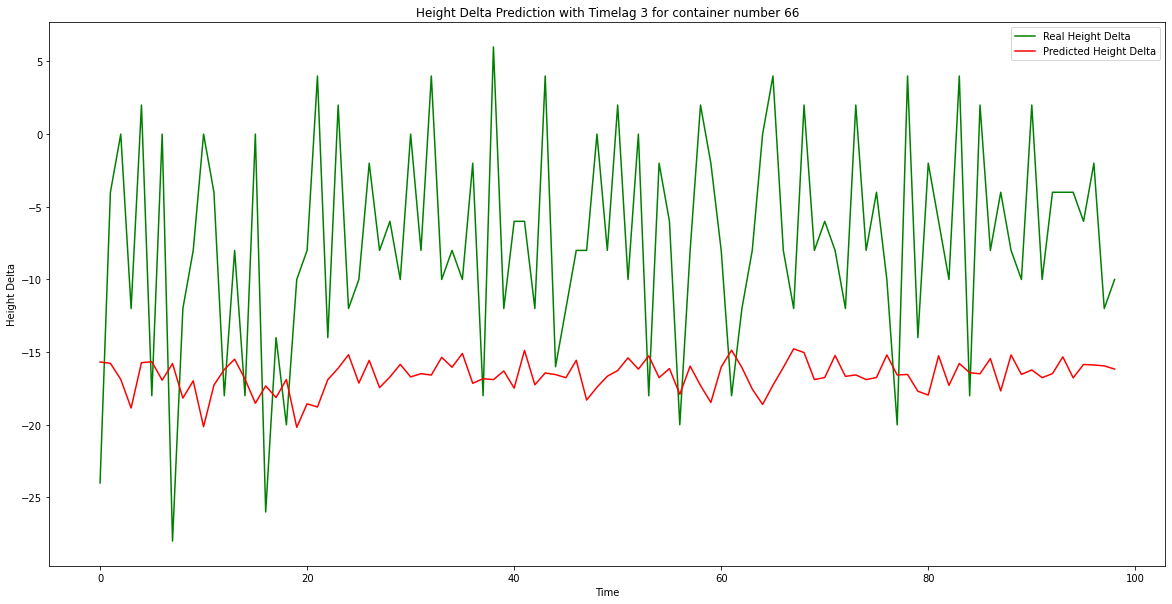

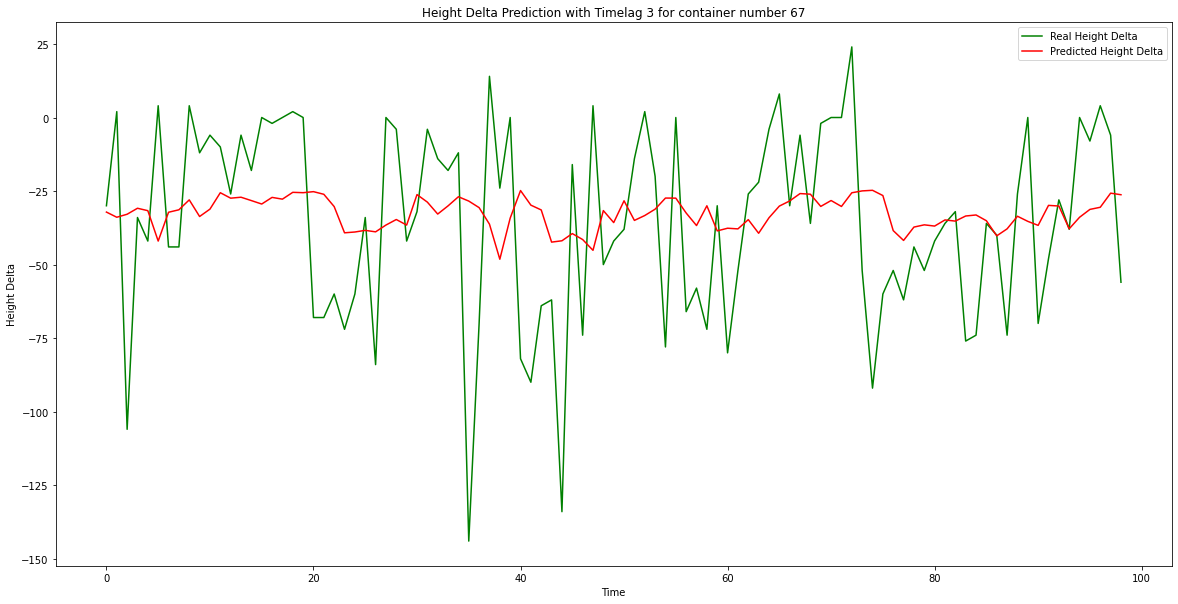

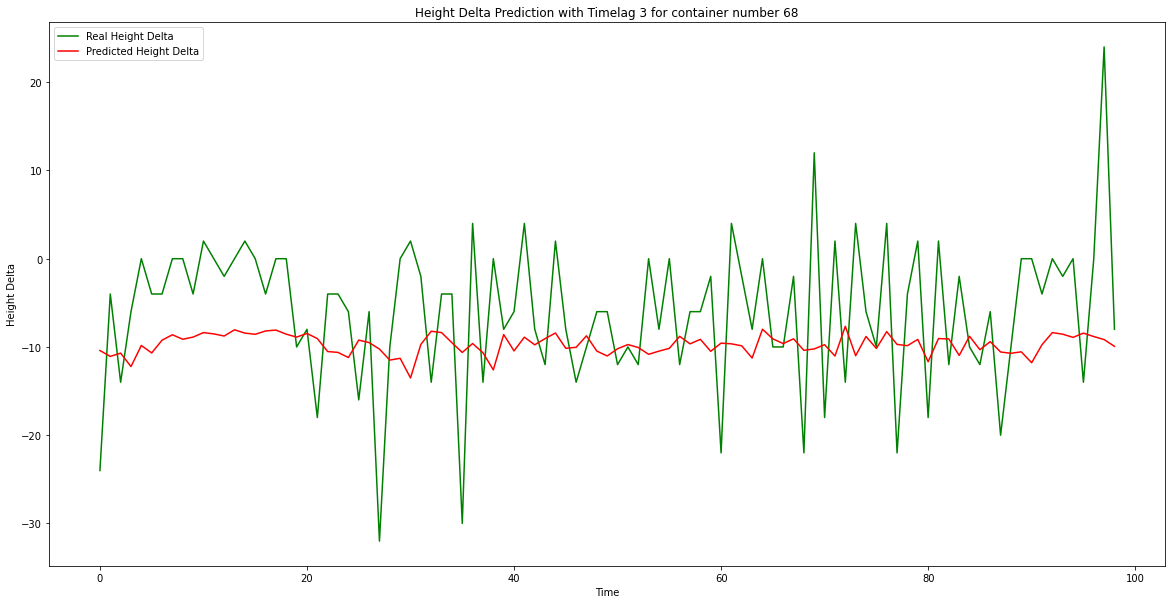

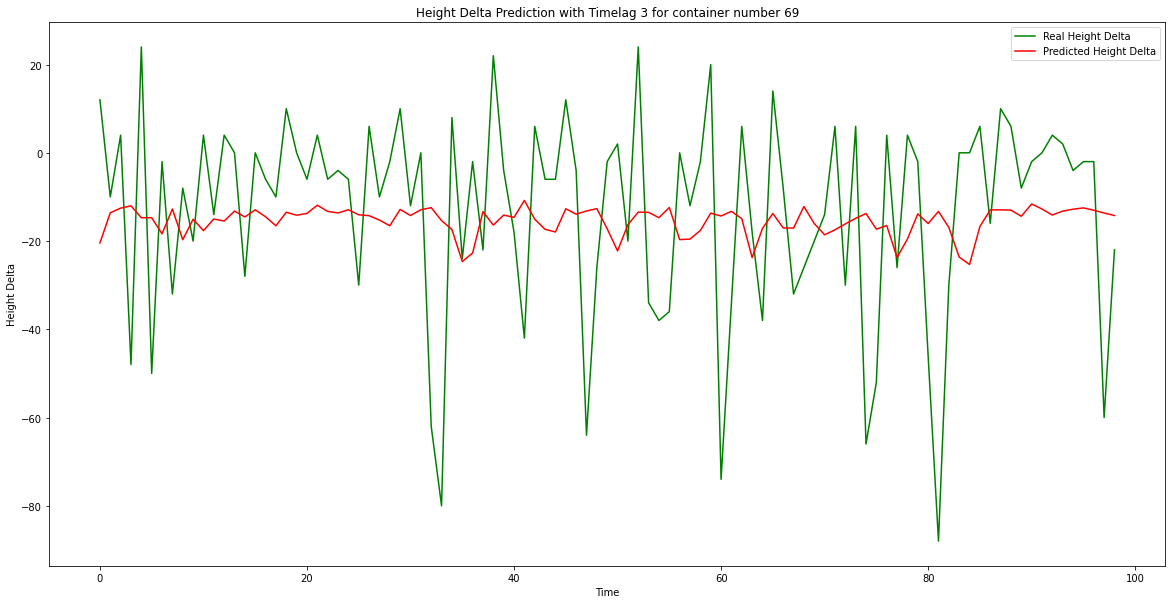

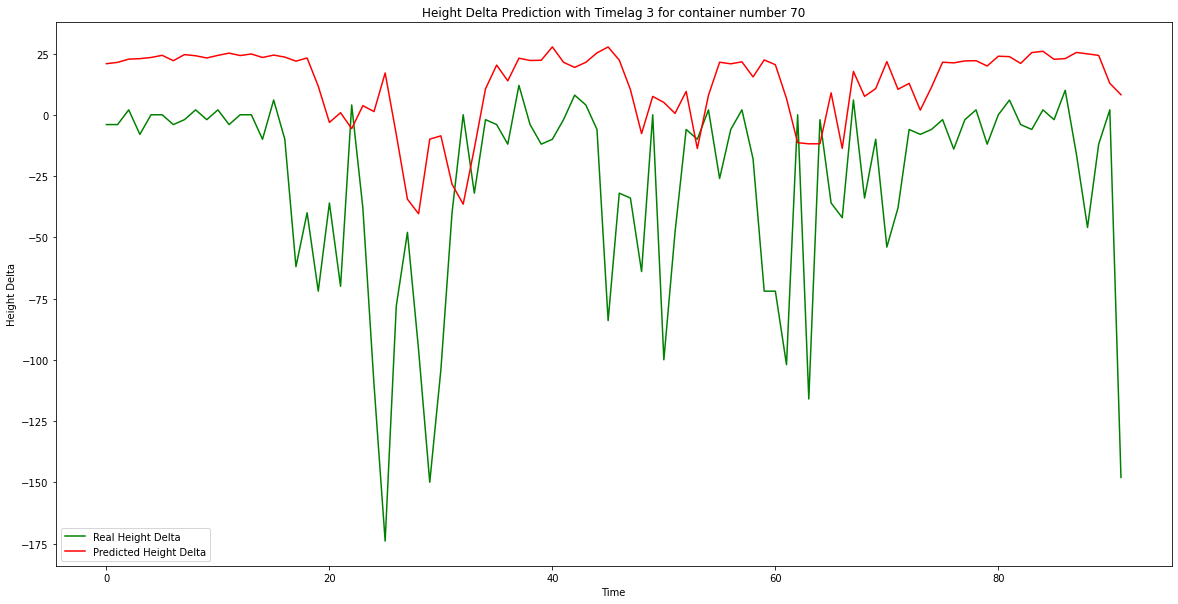

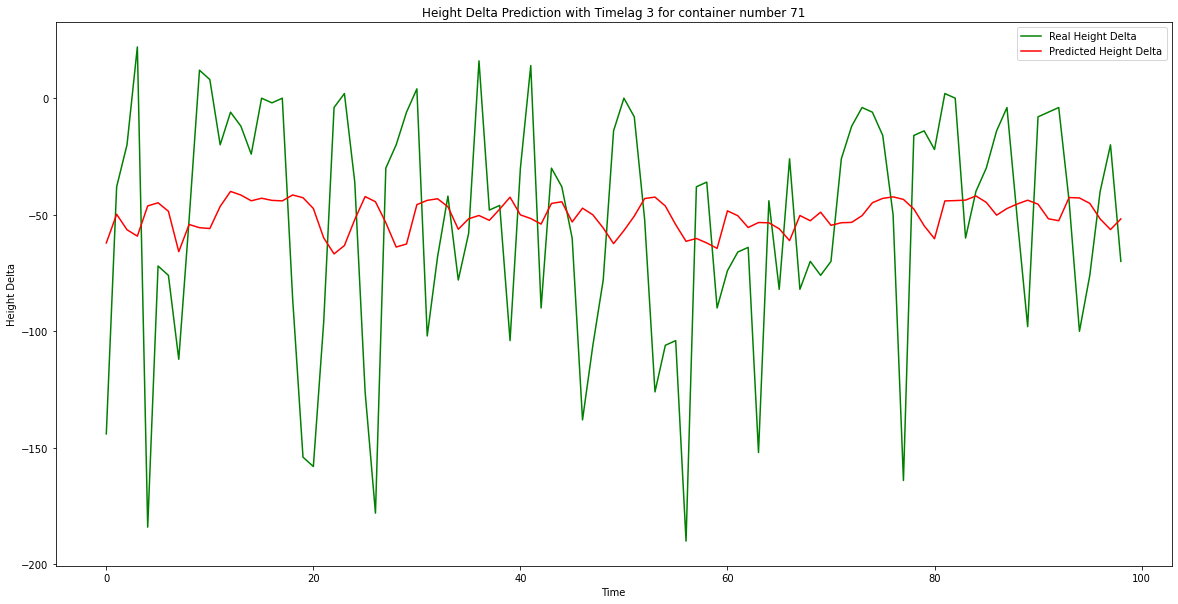

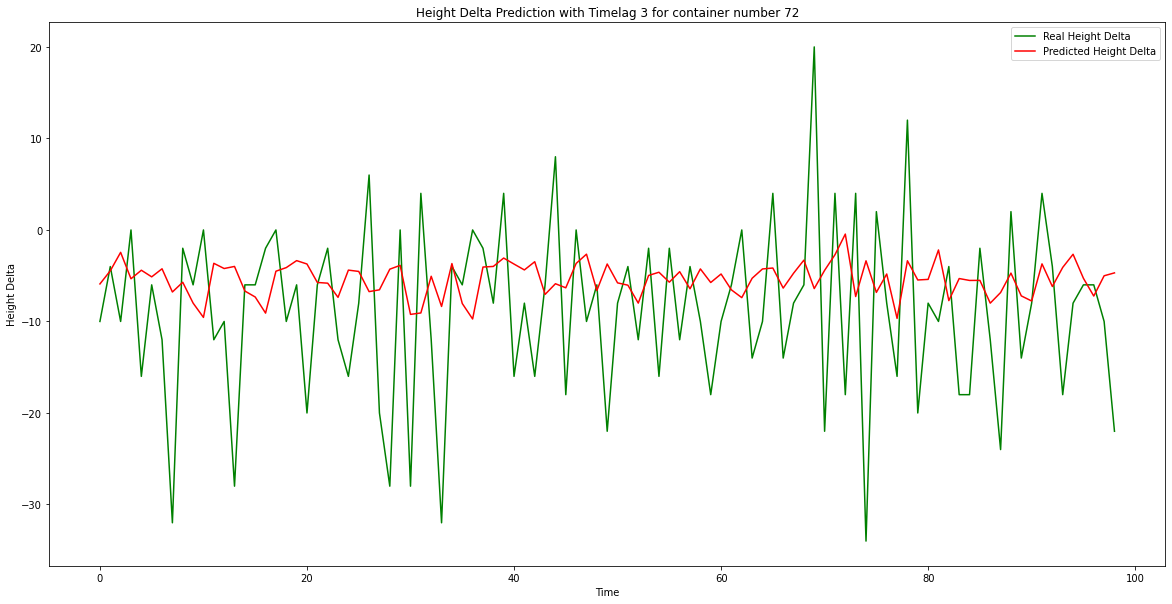

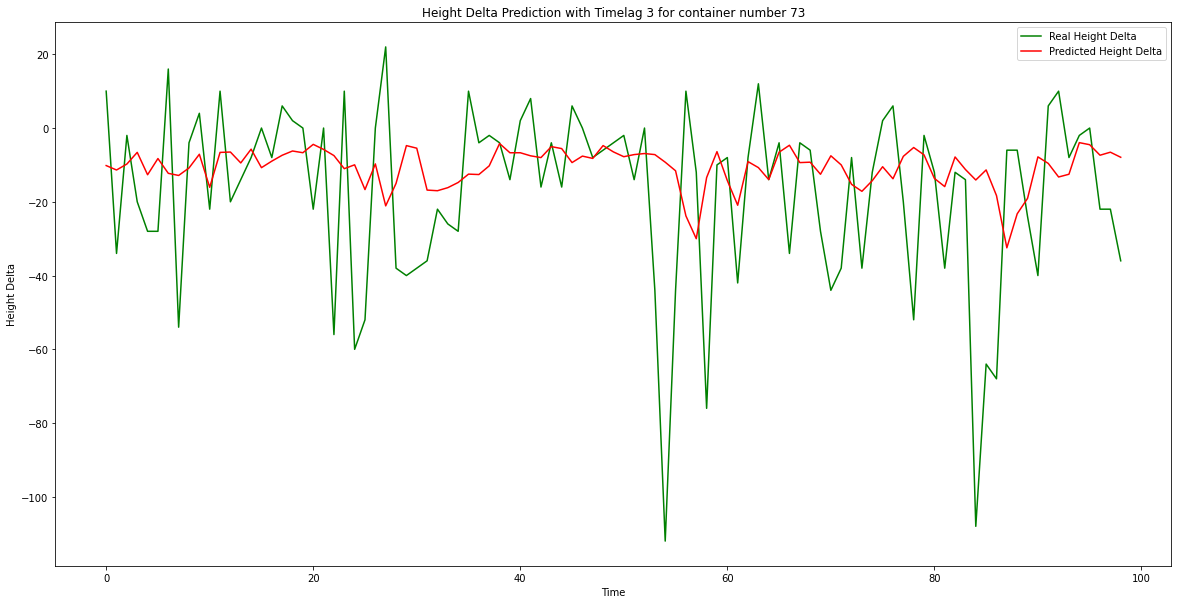

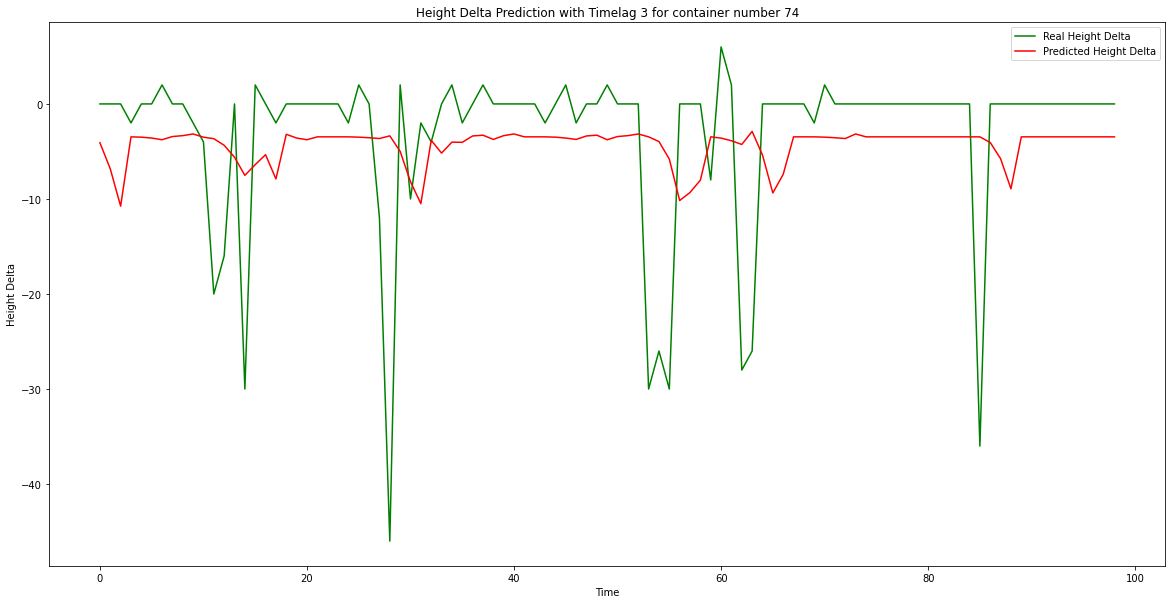

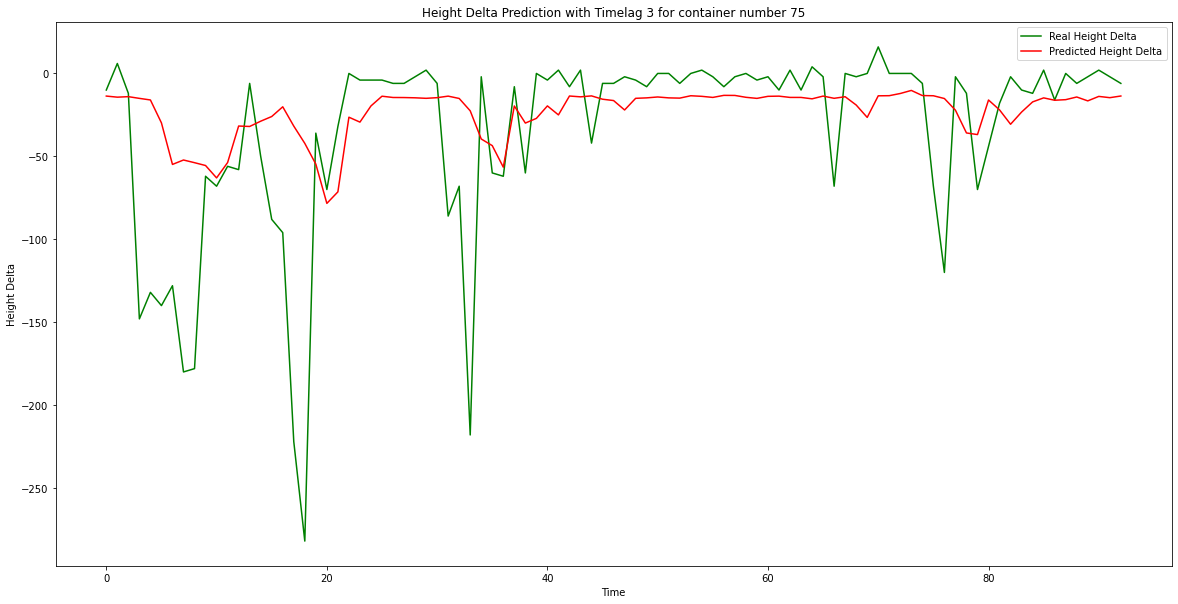

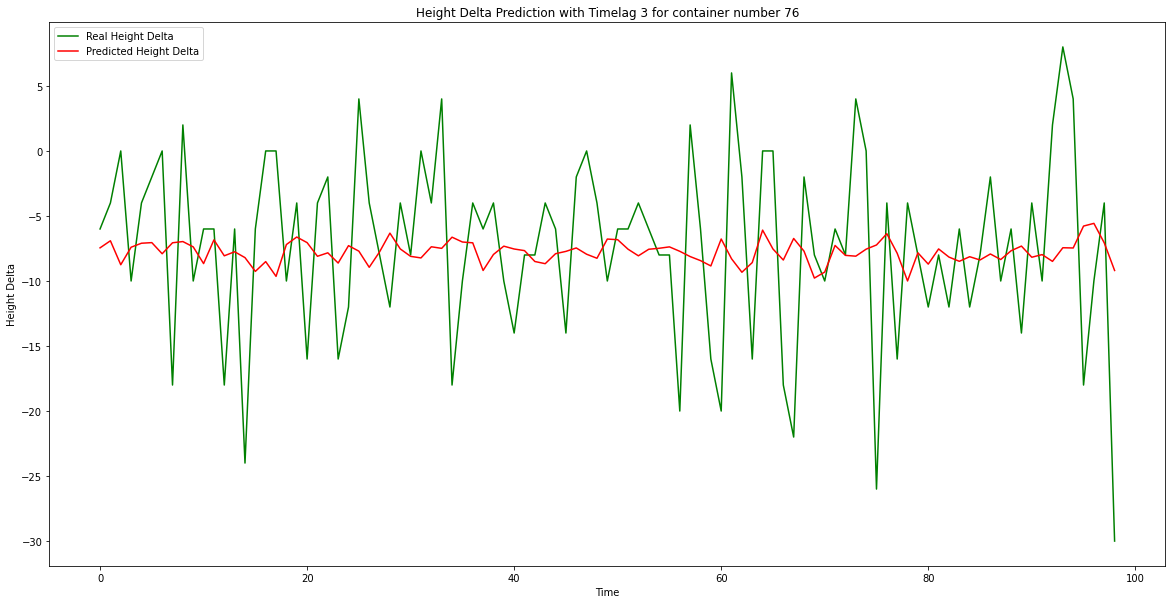

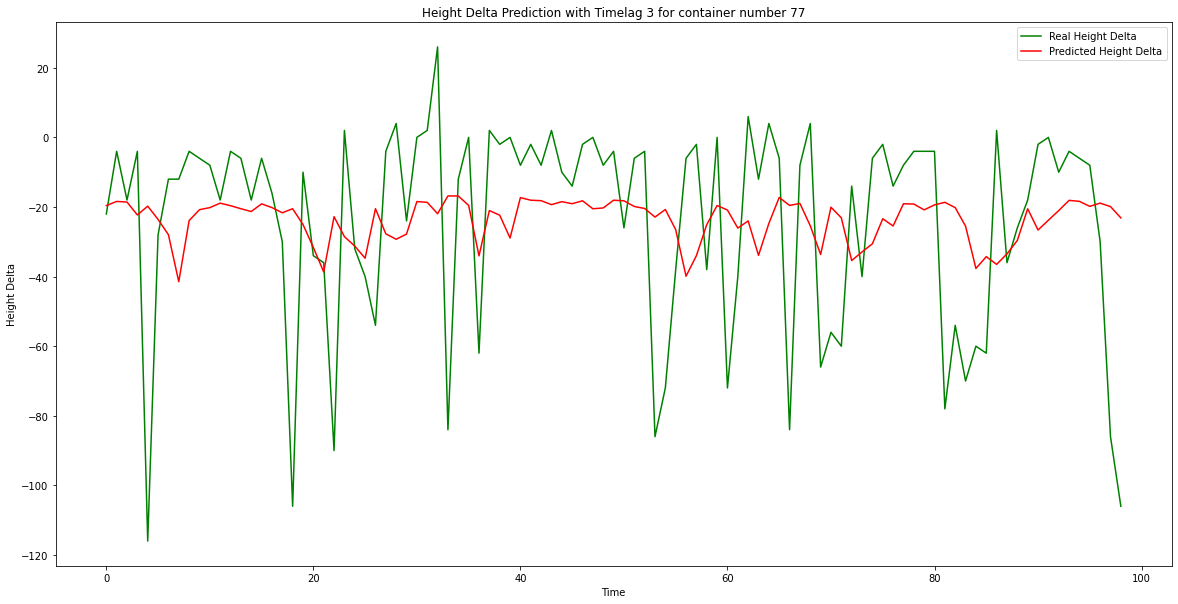

In [5]:
#https://towardsdatascience.com/lstm-time-series-forecasting-predicting-stock-prices-using-an-lstm-model-6223e9644a2f
#https://analyticsindiamag.com/hands-on-guide-to-lstm-recurrent-neural-network-for-stock-market-prediction/
# Feature Scaling

for iterator in range(1,78):
    # ****************** START TUNING *************
    timelag = 3 #10
    epochs_number = 5 #10
    batch_size_number = 16 #32
    container_number = iterator
    # ****************** END TUNING *************

    training_set_sub = training_set[training_set['container_id']==container_number]
    train_set = training_set_sub.iloc[:, 20:21].values

    sc = MinMaxScaler(feature_range = (0, 1))
    training_set_scaled = sc.fit_transform(train_set)
    X_train = []
    y_train = []
    for i in range(timelag, len(training_set_sub)-1):
        X_train.append(training_set_scaled[i-timelag:i, 0])
        y_train.append(training_set_scaled[i, 0]) 
    X_train, y_train = np.array(X_train), np.array(y_train)
    X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
    
    # Configure the model
    regressor = Sequential()
    regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
    regressor.add(Dropout(0.2))
    regressor.add(LSTM(units = 50, return_sequences = True))
    regressor.add(Dropout(0.2))
    regressor.add(LSTM(units = 50, return_sequences = True))
    regressor.add(Dropout(0.2))
    regressor.add(LSTM(units = 50))
    regressor.add(Dropout(0.2))
    regressor.add(Dense(units = 1))
    
    # Train the model
    print('=========== Training Container '+str(container_number)+' ===================')
    regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
    regressor.fit(X_train, y_train, epochs = epochs_number, batch_size = batch_size_number)
    
    # Prepare the test data
    test_set_sub = test_set[test_set['container_id']==container_number]
    real_height = test_set_sub.iloc[:, 20:21].values
    dataset_total = pd.concat((training_set_sub['hight_delta'], test_set_sub['hight_delta']), axis = 0)
    inputs = dataset_total[len(dataset_total) - len(test_set_sub) - timelag:].values
    inputs = inputs.reshape(-1,1)
    inputs = sc.transform(inputs)
    X_test = []
    for i in range(timelag, len(test_set_sub)+timelag):
        X_test.append(inputs[i-timelag:i, 0])
    X_test = np.array(X_test)
    X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
    
    # Predict
    predicted_height = regressor.predict(X_test)
    predicted_height = sc.inverse_transform(predicted_height)
    
    # Plot the prediction
    fig = plt.figure(figsize=(20,10))
    plt.plot(real_height, color = 'green', label = 'Real Height Delta')
    plt.plot(predicted_height, color = 'red', label = 'Predicted Height Delta')
    plt.title('Height Delta Prediction with Timelag '+ str(timelag) + ' for container number ' +str(container_number))
    plt.xlabel('Time')
    plt.ylabel('Height Delta')
    plt.legend()
    fig = fig.patch
    fig.set_facecolor("white")
    plt.savefig('../data/modeling/plots/LSTM/prediction_t3_e5_b16_container'+str(container_number)+'.png', facecolor=fig.get_facecolor(), bbox_inches='tight')